Install required Libraries

In [ ]:
!pip install skfolio;
!pip install arch;
!pip install yfinance;
!pip install pypfopt[plotting];
!pip install quantstats;
!pip install pypfopt;
!pip install ta;
!pip install financetoolkit;
!pip install tabulate;
!pip install plotly;
!pip install statsmodels;
!pip install --upgrade scikit-learn;
!pip install PyPortfolioOpt;
!pip install --upgrade matplotlib;
!pip install --upgrade pandas;
!pip install pandas_datareader;
!pip install SLSQP;

Import the required libraries

In [ ]:
#Data handling and Statistical Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import cvxpy as cp
import time


#Data Visualization
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.io import show
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

#Financial Data
import yfinance as yf
import ta
import quantstats as qs

#Optimization and Allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

#Datetime and Warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from tabulate import tabulate

#Machine Learning
#Model Building
from sklearn.model_selection import train_test_split
from skfolio import PerfMeasure, RatioMeasure, RiskMeasure
from skfolio.optimization import MeanRisk
from skfolio.preprocessing import prices_to_returns
from statsmodels.stats import descriptivestats
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from arch import arch_model
import statsmodels.api as sm
from sklearn.svm import SVR
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

Fetching Historical Data

In [ ]:
tickers = [
    #Mining and Resources Sector
    'AGL.JO', # Anglo American
    'SOL.JO', # Sasol
    'GFI.JO', # Gold Fields
    'ANG.JO', # AngloGold Ashanti
    'IMP.JO', # Impala Platinum
    'GLN.JO', # Glencore
    # Financial Sector
    'SBK.JO', # Standard Bank
    'FSR.JO', # FirstRand Bank
    'DSY.JO', # Discovery Bank
    'NED.JO', # Nedbank
    'CPI.JO', # Capitec
    'INL.JO', # Investec
    # Retail and Consumer Goods Sector
    'SHP.JO', # Shoprite
    'WHL.JO', # Woolworths
    'PPH.JO', # Pepkor
    'TFG.JO', # The Foschini Group
    'RCL.JO', # RCL Foods
    # Telecommunications Industry
    'MTN.JO', # MTN Group
    'VOD.JO', # Vodacom
    # Healthcare Sector
    'NTC.JO', # Netcare
    'APN.JO', # Aspen Pharmacare
    # Industrial Sector
    'BVT.JO', # Bidvest
    'BID.JO', # Bidcorp
    'BAW.JO', # Barloworld
    # Investment Holding Sector
    'NPN.JO', # Naspers
    'REM.JO', # Remgro
]

# Define the start date as '2019-01-01' (We want to look at the historical data for only 5 years. That is why we are specifying the start date.)
start_date='2018-01-01'

# Get the current date as the end date
end_date='2024-06-30'

# Retrieve data from Yahoo Finance for each stock symbol
stock_data = {}
for symbol in tickers:
    try:
        stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)
        print(f"Data successfully retrieved for {symbol}.")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Print the first few rows of the data for each stock
for symbol, data in stock_data.items():
    print(f"Stock Symbol: {symbol}")
    print(data.tail(2))
    print()

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for AGL.JO.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for SOL.JO.
Data successfully retrieved for GFI.JO.
Data successfully retrieved for ANG.JO.
Data successfully retrieved for IMP.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for GLN.JO.
Data successfully retrieved for SBK.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for FSR.JO.
Data successfully retrieved for DSY.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for NED.JO.
Data successfully retrieved for CPI.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for INL.JO.
Data successfully retrieved for SHP.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for WHL.JO.
Data successfully retrieved for PPH.JO.
Data successfully retrieved for TFG.JO.
Data successfully retrieved for RCL.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for MTN.JO.
Data successfully retrieved for VOD.JO.
Data successfully retrieved for NTC.JO.
Data successfully retrieved for APN.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for BVT.JO.
Data successfully retrieved for BID.JO.
Data successfully retrieved for BAW.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for NPN.JO.
Data successfully retrieved for REM.JO.
Stock Symbol: AGL.JO
               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2024-06-27  59220.0  58370.0  57139.0  58060.0  57192.671875   820957
2024-06-28  57960.0  58272.0  57267.0  57650.0  56788.796875  1354193

Stock Symbol: SOL.JO
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2024-06-27  13548.0  13598.0  13219.0  13487.0    13487.0  1493376
2024-06-28  13500.0  13949.0  13467.0  13810.0    13810.0  1984099

Stock Symbol: GFI.JO
               Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2024-06-27  27425.0  28245.0  27263.0  28163.0  27811.607422  1834190
2024-06-28  27944.0  28634.0  27342.0  27342.0  27000.851562  2801038

Stock Symbol: ANG.JO
     

Combine DataFrames

In [ ]:
# Concatenate 'Close' prices from each DataFrame into a single DataFrame
df1 = pd.concat([data['Adj Close'] for data in stock_data.values()], axis=1)
df1.columns = tickers  # Set column names as selected tickers

# Print the first few rows of the new DataFrame
print("Close Prices:")
print(df1.head(2).round(2))

Close Prices:
              AGL.JO    SOL.JO   GFI.JO    ANG.JO   IMP.JO   GLN.JO    SBK.JO  \
Date                                                                            
2018-01-02  20400.97  35790.80  4596.75  11886.25  2484.27  6421.64  12810.46   
2018-01-03  20489.28  35954.07  4636.91  12162.76  2560.47  6428.52  12203.17   

             FSR.JO    DSY.JO    NED.JO  ...   RCL.JO    MTN.JO   VOD.JO  \
Date                                     ...                               
2018-01-02  4755.82  17118.23  17032.73  ...  1252.75  10226.21  9875.61   
2018-01-03  4541.99  16940.01  16437.83  ...  1253.57  10147.45  9671.88   

             NTC.JO    APN.JO    BVT.JO    BID.JO   BAW.JO     NPN.JO  \
Date                                                                    
2018-01-02  1956.27  24932.66  17191.64  25946.00  8870.28  221483.69   
2018-01-03  1915.40  24861.49  16731.66  25833.01  8750.24  225757.59   

              REM.JO  
Date                  
2018-01-02  14635

In [ ]:
df1.head() #View the first 5 rows of the DataFrame

AGL.JO        SOL.JO       GFI.JO        ANG.JO  \
Date                                                                
2018-01-02  20400.966797  35790.796875  4596.753906  11886.247070   
2018-01-03  20489.281250  35954.070312  4636.908691  12162.757812   
2018-01-04  20619.429688  35839.859375  4453.707031  11846.481445   
2018-01-05  20798.384766  36362.671875  4541.542969  12060.106445   
2018-01-08  21226.791016  36715.449219  4488.003418  12199.749023   

                 IMP.JO       GLN.JO        SBK.JO       FSR.JO        DSY.JO  \
Date                                                                            
2018-01-02  2484.265137  6421.640625  12810.460938  4755.816406  17118.228516   
2018-01-03  2560.469727  6428.519043  12203.171875  4541.990723  16940.011719   
2018-01-04  2467.499756  6412.796387  12369.333984  4531.945801  17071.332031   
2018-01-05  2533.798096  6406.899902  12383.184570  4571.409668  17043.191406   
2018-01-08  2603.144287  6520.888184  12511.104492  4530.510254  16884.667969   

                  NED.JO  ...       RCL.JO        MTN.JO       VOD.JO  \
Date                      ...                                           
2018-01-02  17032.730469  ...  1252.749390  10226.208984  9875.611328   
2018-01-03  16437.833984  ...  1253.573853  10147.446289  9671.884766   
2018-01-04  16458.710938  ...  1277.474731   9992.212891  9706.182617   
2018-01-05  16848.783203  ...  1307.969116  10301.913086  9877.670898   
2018-01-08  16666.138672  ...  1277.474731  10380.677734  9935.975586   

                 NTC.JO        APN.JO        BVT.JO        BID.JO  \
Date                                                                
2018-01-02  1956.273315  24932.656250  17191.638672  25946.003906   
2018-01-03  1915.402954  24861.492188  16731.656250  25833.005859   
2018-01-04  1920.904663  24542.169922  16607.964844  25228.904297   
2018-01-05  1909.114868  24541.255859  16902.228516  25359.283203   
2018-01-08  1905.971191  23910.824219  17079.269531  25793.892578   

                 BAW.JO         NPN.JO        REM.JO  
Date                                                  
2018-01-02  8870.277344  221483.687500  14635.837891  
2018-01-03  8750.244141  225757.593750  14197.092773  
2018-01-04  8979.656250  224935.609375  14356.749023  
2018-01-05  8999.290039  223681.859375  14256.499023  
2018-01-08  9072.767578  222481.328125  14347.463867  

[5 rows x 26 columns]

Calculating the Daily Returns

In [ ]:
df = df1.pct_change().dropna()

df2 = (df)*100
df2.head()

AGL.JO    SOL.JO    GFI.JO    ANG.JO    IMP.JO    GLN.JO  \
Date                                                                     
2018-01-03  0.432893  0.456188  0.873547  2.326308  3.067490  0.107113   
2018-01-04  0.635203 -0.317658 -3.950944 -2.600367 -3.630973 -0.244577   
2018-01-05  0.867895  1.458746  1.972198  1.803278  2.686863 -0.091949   
2018-01-08  2.059805  0.970163 -1.178885  1.157888  2.736848  1.779149   
2018-01-09  1.824824 -0.988482 -3.075462 -2.342325 -2.254110 -0.015081   

              SBK.JO    FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO  \
Date                                                ...                       
2018-01-03 -4.740572 -4.496088 -1.041094 -3.492667  ...  0.065812 -0.770204   
2018-01-04  1.361630 -0.221157  0.775208  0.127005  ...  1.906619 -1.529778   
2018-01-05  0.111975  0.870793 -0.164841  2.370005  ...  2.387083  3.099416   
2018-01-08  1.033013 -0.894678 -0.930128 -1.084022  ... -2.331430  0.764563   
2018-01-09  1.233264  0.395937  0.094460  1.859086  ... -1.096763 -0.110519   

              VOD.JO    NTC.JO    APN.JO    BVT.JO    BID.JO    BAW.JO  \
Date                                                                     
2018-01-03 -2.062926 -2.089195 -0.285425 -2.675617 -0.435512 -1.353207   
2018-01-04  0.354614  0.287235 -1.284405 -0.739266 -2.338487  2.621780   
2018-01-05  1.766794 -0.613763 -0.003724  1.771823  0.516784  0.218647   
2018-01-08  0.590268 -0.164667 -2.568865  1.047442  1.713808  0.816482   
2018-01-09 -0.586804  0.000000 -4.559667 -0.203543  0.374051  3.864006   

              NPN.JO    REM.JO  
Date                            
2018-01-03  1.929671 -2.997745  
2018-01-04 -0.364100  1.124570  
2018-01-05 -0.557382 -0.698278  
2018-01-08 -0.536714  0.638059  
2018-01-09  0.944398 -0.129365  

[5 rows x 26 columns]

Visualize the bottom five rows of the dataframe

In [ ]:
#Displaying the first few rows of the new dataset.
df.tail().round(4)

AGL.JO  SOL.JO  GFI.JO  ANG.JO  IMP.JO  GLN.JO  SBK.JO  FSR.JO  \
Date                                                                         
2024-06-24  0.0326  0.0236  0.0312  0.0210  0.0290  0.0235 -0.0009 -0.0276   
2024-06-25  0.0064 -0.0176 -0.0066  0.0121 -0.0356 -0.0128 -0.0063  0.0029   
2024-06-26  0.0067 -0.0049  0.0044  0.0143  0.0021  0.0029 -0.0176 -0.0008   
2024-06-27 -0.0053 -0.0038  0.0367  0.0290 -0.0106  0.0061 -0.0091 -0.0190   
2024-06-28 -0.0071  0.0239 -0.0292 -0.0075  0.0057 -0.0127  0.0280  0.0478   

            DSY.JO  NED.JO  ...  RCL.JO  MTN.JO  VOD.JO  NTC.JO  APN.JO  \
Date                        ...                                           
2024-06-24 -0.0071 -0.0187  ...  0.0367  0.0019  0.0225 -0.0318 -0.0192   
2024-06-25  0.0087 -0.0121  ...  0.0197 -0.0088 -0.0206 -0.0063  0.0051   
2024-06-26 -0.0178 -0.0174  ...  0.1839 -0.0265 -0.0220 -0.0205 -0.0482   
2024-06-27 -0.0261 -0.0195  ... -0.0727  0.0049 -0.0068  0.0217  0.0275   
2024-06-28  0.0375  0.0321  ... -0.0157  0.0272  0.0501  0.0024 -0.0093   

            BVT.JO  BID.JO  BAW.JO  NPN.JO  REM.JO  
Date                                                
2024-06-24 -0.0206  0.0115 -0.0082  0.0266  0.0007  
2024-06-25 -0.0092  0.0057 -0.0102 -0.0325 -0.0096  
2024-06-26 -0.0090  0.0076 -0.0050  0.0048 -0.0266  
2024-06-27  0.0020 -0.0135 -0.0105 -0.0068 -0.0203  
2024-06-28  0.0273 -0.0013 -0.0380  0.0028  0.0194  

[5 rows x 26 columns]

Descriptive Statistics

In [ ]:
descript=descriptivestats.describe(df2)
descript.T.head()

nobs  missing      mean   std_err  upper_ci  lower_ci       std  \
AGL.JO  1621.0      0.0  0.092730  0.060469  0.211248 -0.025788  2.434594   
SOL.JO  1621.0      0.0  0.024575  0.101027  0.222585 -0.173435  4.067526   
GFI.JO  1621.0      0.0  0.165983  0.083647  0.329928  0.002038  3.367761   
ANG.JO  1621.0      0.0  0.131144  0.077037  0.282132 -0.019845  3.101618   
IMP.JO  1621.0      0.0  0.148417  0.092006  0.328746 -0.031912  3.704323   

             iqr  iqr_normal       mad  ...    median        1%        5%  \
AGL.JO  2.679853    1.986578  1.768980  ...  0.075000 -6.634492 -3.647798   
SOL.JO  3.012667    2.233293  2.364660  ... -0.058320 -8.819136 -4.834010   
GFI.JO  3.473239    2.574716  2.374043  ...  0.053845 -8.402956 -4.648375   
ANG.JO  3.416969    2.533003  2.237220  ...  0.023423 -7.574712 -4.600943   
IMP.JO  4.142799    3.071061  2.682619  ...  0.024348 -8.417101 -5.529889   

             10%       25%       50%       75%       90%       95%        99%  
AGL.JO -2.665133 -1.239757  0.075000  1.440096  2.858872  3.811951   6.110176  
SOL.JO -3.386303 -1.592274 -0.058320  1.420392  3.472109  4.846690  11.783752  
GFI.JO -3.428035 -1.566855  0.053845  1.906385  3.896096  5.115346   9.127579  
ANG.JO -3.126758 -1.592273  0.023423  1.824696  3.659063  5.002000   8.817437  
IMP.JO -3.994206 -1.868423  0.024348  2.274376  4.283600  5.809447  10.356637  

[5 rows x 31 columns]

Creating a new dataframe with dropped columns of the descriptives.

In [ ]:
summary_stats = descript.T.drop(
    columns=[
        'nobs','missing', 'std_err', 'upper_ci','lower_ci','iqr',
        'iqr_normal','5%','10%','25%','50%','75%','90%','95%','99%','median',
        'mad','mad_normal','coef_var','range','mode','mode_freq','jarque_bera_pval'
        ]
    )
summary_stats.round(4)

mean     std      max      min    skew  kurtosis  jarque_bera  \
AGL.JO  0.0927  2.4346  18.9202 -13.3194  0.2160    8.4594    2025.6944   
SOL.JO  0.0246  4.0675  53.4834 -46.5627  0.9812   41.5134  100443.3486   
GFI.JO  0.1660  3.3678  21.0630 -20.4089  0.1203    8.8947    2350.8404   
ANG.JO  0.1311  3.1016  25.1639 -14.4481  0.4935    8.0672    1800.0161   
IMP.JO  0.1484  3.7043  21.7411 -22.6534  0.2073    7.5046    1382.1258   
GLN.JO  0.0553  2.2523   9.9314 -13.1988 -0.1116    5.1894     327.1262   
SBK.JO  0.0505  2.0850  12.4136 -12.7563  0.0067    7.3465    1276.0088   
FSR.JO  0.0503  2.1128  13.7758 -14.2791  0.0118    7.7138    1500.8377   
DSY.JO  0.0094  2.2169  17.8190 -15.0972 -0.2281   11.2253    4583.6534   
NED.JO  0.0505  2.3388  13.6711 -15.7781  0.1105    9.6598    2998.9666   
CPI.JO  0.0912  2.4634  42.1583 -27.9214  1.8865   68.8816  294118.0936   
INL.JO  0.1064  2.1888  18.2500 -16.2496  0.0892   10.1760    3480.2466   
SHP.JO  0.0470  1.9885  13.6302 -14.2129  0.2409    8.5563    2100.8721   
WHL.JO  0.0335  2.0941  10.9127 -10.3037  0.4321    6.4631     860.4628   
PPH.JO  0.0425  2.1877  10.6796 -11.3636  0.2702    6.1758     700.9144   
TFG.JO  0.0266  2.4717  11.6564 -16.1582  0.0914    6.6926     923.2134   
RCL.JO  0.0337  3.1451  18.3871 -25.5889 -0.0205    8.5503    2080.7570   
MTN.JO  0.0271  2.7683  19.1872 -19.4149 -0.0761   13.0353    6803.5231   
VOD.JO  0.0125  1.6346  15.2915  -7.6888  0.5486    8.8762    2413.5333   
NTC.JO -0.0083  1.9747  11.3848 -21.9231 -0.5349   14.7925    9469.8185   
APN.JO  0.0264  2.4897  13.2920 -28.6858 -0.8981   18.3663   16165.9804   
BVT.JO  0.0500  2.0026  15.2850  -9.9373  0.5366    7.7233    1584.5920   
BID.JO  0.0467  1.8516  13.7947 -13.4641  0.2429    9.7841    3124.4517   
BAW.JO  0.0249  2.3933  15.6091 -11.5498  0.6575    8.6508    2273.5228   
NPN.JO  0.0649  2.6701  22.7900 -17.6966  0.4108   11.7821    5254.7578   
REM.JO  0.0100  1.7041   7.5741  -8.4343  0.0066    5.0336     279.3345   

            1%  
AGL.JO -6.6345  
SOL.JO -8.8191  
GFI.JO -8.4030  
ANG.JO -7.5747  
IMP.JO -8.4171  
GLN.JO -5.6480  
SBK.JO -5.3158  
FSR.JO -4.9991  
DSY.JO -6.0041  
NED.JO -6.0361  
CPI.JO -5.7081  
INL.JO -5.9696  
SHP.JO -4.8058  
WHL.JO -5.1332  
PPH.JO -5.4326  
TFG.JO -6.5300  
RCL.JO -7.5030  
MTN.JO -7.7399  
VOD.JO -4.1801  
NTC.JO -4.4744  
APN.JO -5.7079  
BVT.JO -5.1184  
BID.JO -4.5004  
BAW.JO -5.8827  
NPN.JO -6.8633  
REM.JO -4.4773

Print the Suymmary Statistics and convert to Latex

In [ ]:
print(summary_stats.to_latex(index=True, float_format="{:.4f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
 & mean & std & max & min & skew & kurtosis & jarque_bera & 1% \\
\midrule
AGL.JO & 0.0927 & 2.4346 & 18.9202 & -13.3194 & 0.2160 & 8.4594 & 2025.6944 & -6.6345 \\
SOL.JO & 0.0246 & 4.0675 & 53.4834 & -46.5627 & 0.9812 & 41.5134 & 100443.3486 & -8.8191 \\
GFI.JO & 0.1660 & 3.3678 & 21.0630 & -20.4089 & 0.1203 & 8.8947 & 2350.8404 & -8.4030 \\
ANG.JO & 0.1311 & 3.1016 & 25.1639 & -14.4481 & 0.4935 & 8.0672 & 1800.0161 & -7.5747 \\
IMP.JO & 0.1484 & 3.7043 & 21.7411 & -22.6534 & 0.2073 & 7.5046 & 1382.1258 & -8.4171 \\
GLN.JO & 0.0553 & 2.2523 & 9.9314 & -13.1988 & -0.1116 & 5.1894 & 327.1262 & -5.6480 \\
SBK.JO & 0.0505 & 2.0850 & 12.4136 & -12.7563 & 0.0067 & 7.3465 & 1276.0088 & -5.3158 \\
FSR.JO & 0.0503 & 2.1128 & 13.7758 & -14.2791 & 0.0118 & 7.7138 & 1500.8377 & -4.9991 \\
DSY.JO & 0.0094 & 2.2169 & 17.8190 & -15.0972 & -0.2281 & 11.2253 & 4583.6534 & -6.0041 \\
NED.JO & 0.0505 & 2.3388 & 13.6711 & -15.7781 & 0.1105 & 9.6598 & 2998.9666 & -6.036

Calculte the Returns

In [ ]:
Returns = df2 #These are normal returns, normalised.
Returns.head()

AGL.JO    SOL.JO    GFI.JO    ANG.JO    IMP.JO    GLN.JO  \
Date                                                                     
2018-01-03  0.432893  0.456188  0.873547  2.326308  3.067490  0.107113   
2018-01-04  0.635203 -0.317658 -3.950944 -2.600367 -3.630973 -0.244577   
2018-01-05  0.867895  1.458746  1.972198  1.803278  2.686863 -0.091949   
2018-01-08  2.059805  0.970163 -1.178885  1.157888  2.736848  1.779149   
2018-01-09  1.824824 -0.988482 -3.075462 -2.342325 -2.254110 -0.015081   

              SBK.JO    FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO  \
Date                                                ...                       
2018-01-03 -4.740572 -4.496088 -1.041094 -3.492667  ...  0.065812 -0.770204   
2018-01-04  1.361630 -0.221157  0.775208  0.127005  ...  1.906619 -1.529778   
2018-01-05  0.111975  0.870793 -0.164841  2.370005  ...  2.387083  3.099416   
2018-01-08  1.033013 -0.894678 -0.930128 -1.084022  ... -2.331430  0.764563   
2018-01-09  1.233264  0.395937  0.094460  1.859086  ... -1.096763 -0.110519   

              VOD.JO    NTC.JO    APN.JO    BVT.JO    BID.JO    BAW.JO  \
Date                                                                     
2018-01-03 -2.062926 -2.089195 -0.285425 -2.675617 -0.435512 -1.353207   
2018-01-04  0.354614  0.287235 -1.284405 -0.739266 -2.338487  2.621780   
2018-01-05  1.766794 -0.613763 -0.003724  1.771823  0.516784  0.218647   
2018-01-08  0.590268 -0.164667 -2.568865  1.047442  1.713808  0.816482   
2018-01-09 -0.586804  0.000000 -4.559667 -0.203543  0.374051  3.864006   

              NPN.JO    REM.JO  
Date                            
2018-01-03  1.929671 -2.997745  
2018-01-04 -0.364100  1.124570  
2018-01-05 -0.557382 -0.698278  
2018-01-08 -0.536714  0.638059  
2018-01-09  0.944398 -0.129365  

[5 rows x 26 columns]

## **Calculate variance-covariance matrix**

In [ ]:
covariance_matrix = Returns.cov()
covariance_matrix.head()

#We can also note that the diagonal elements of the matrix represent the variance of individual stocks

AGL.JO     SOL.JO     GFI.JO    ANG.JO     IMP.JO    GLN.JO  \
AGL.JO  5.927249   4.169400   1.940492  1.827733   4.305643  3.918525   
SOL.JO  4.169400  16.544768   0.509031  0.676731   5.206965  4.219125   
GFI.JO  1.940492   0.509031  11.341816  8.696282   4.838407  1.271268   
ANG.JO  1.827733   0.676731   8.696282  9.620036   4.625989  1.011226   
IMP.JO  4.305643   5.206965   4.838407  4.625989  13.722010  3.292484   

          SBK.JO    FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO  \
AGL.JO  1.505578  1.541179  1.528716  1.499501  ...  0.189019  1.804508   
SOL.JO  3.069094  2.691959  2.959034  3.929216  ...  0.625553  3.988594   
GFI.JO -0.035676  0.044966  0.431943 -0.057618  ... -0.176702  0.406531   
ANG.JO -0.065227  0.035216  0.438395 -0.099443  ...  0.067631  0.405478   
IMP.JO  1.801288  1.636290  1.923197  2.060929  ...  0.674467  2.446912   

          VOD.JO    NTC.JO    APN.JO    BVT.JO    BID.JO    BAW.JO    NPN.JO  \
AGL.JO  0.705861  0.777259  0.848240  1.060121  1.223962  1.599528  1.537999   
SOL.JO  1.040908  1.585427  1.352607  2.108256  2.497170  2.661952  1.194035   
GFI.JO  0.366377  0.107133  0.354589  0.286979  0.601486  0.204111  0.570003   
ANG.JO  0.440057  0.149665  0.317178  0.229695  0.520615  0.193935  0.489310   
IMP.JO  0.782051  1.232977  1.009582  1.466447  1.571393  1.828567  1.858702   

          REM.JO  
AGL.JO  1.183350  
SOL.JO  2.362294  
GFI.JO  0.282666  
ANG.JO  0.267923  
IMP.JO  1.483938  

[5 rows x 26 columns]

In [ ]:
print(covariance_matrix.to_latex(index=True, float_format="{:.4f}".format)) #converting the covariance matrix to latex

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & AGL.JO & SOL.JO & GFI.JO & ANG.JO & IMP.JO & GLN.JO & SBK.JO & FSR.JO & DSY.JO & NED.JO & CPI.JO & INL.JO & SHP.JO & WHL.JO & PPH.JO & TFG.JO & RCL.JO & MTN.JO & VOD.JO & NTC.JO & APN.JO & BVT.JO & BID.JO & BAW.JO & NPN.JO & REM.JO \\
\midrule
AGL.JO & 5.9272 & 4.1694 & 1.9405 & 1.8277 & 4.3056 & 3.9185 & 1.5056 & 1.5412 & 1.5287 & 1.4995 & 1.4499 & 2.2223 & 0.6756 & 1.1261 & 0.9256 & 1.4712 & 0.1890 & 1.8045 & 0.7059 & 0.7773 & 0.8482 & 1.0601 & 1.2240 & 1.5995 & 1.5380 & 1.1834 \\
SOL.JO & 4.1694 & 16.5448 & 0.5090 & 0.6767 & 5.2070 & 4.2191 & 3.0691 & 2.6920 & 2.9590 & 3.9292 & 2.0228 & 3.4216 & 1.2005 & 2.1072 & 2.0834 & 2.7706 & 0.6256 & 3.9886 & 1.0409 & 1.5854 & 1.3526 & 2.1083 & 2.4972 & 2.6620 & 1.1940 & 2.3623 \\
GFI.JO & 1.9405 & 0.5090 & 11.3418 & 8.6963 & 4.8384 & 1.2713 & -0.0357 & 0.0450 & 0.4319 & -0.0576 & 0.7342 & 0.4598 & 0.1740 & 0.3527 & 0.0372 & 0.1041 & -0.1767 & 0.4065 & 0.3664 & 0.1071 & 0.3546 & 0.2870 &

Variance for each stock returns

In [ ]:
var = Returns.var()

# Print the variance for each symbol
print("Variance for Each Symbol:")
print(var),

Variance for Each Symbol:
AGL.JO     5.927249
SOL.JO    16.544768
GFI.JO    11.341816
ANG.JO     9.620036
IMP.JO    13.722010
GLN.JO     5.072640
SBK.JO     4.347089
FSR.JO     4.463785
DSY.JO     4.914633
NED.JO     5.470160
CPI.JO     6.068218
INL.JO     4.790996
SHP.JO     3.953997
WHL.JO     4.385380
PPH.JO     4.785866
TFG.JO     6.109383
RCL.JO     9.891637
MTN.JO     7.663422
VOD.JO     2.671896
NTC.JO     3.899266
APN.JO     6.198557
BVT.JO     4.010519
BID.JO     3.428462
BAW.JO     5.727975
NPN.JO     7.129556
REM.JO     2.904028
dtype: float64


(None,)

In [ ]:
stock_var = var.max(), var.min() #minimum and maximum variance for the stocks returns
stock_var

(16.544768284663522, 2.671896227437751)

Plotting the Stock Returns

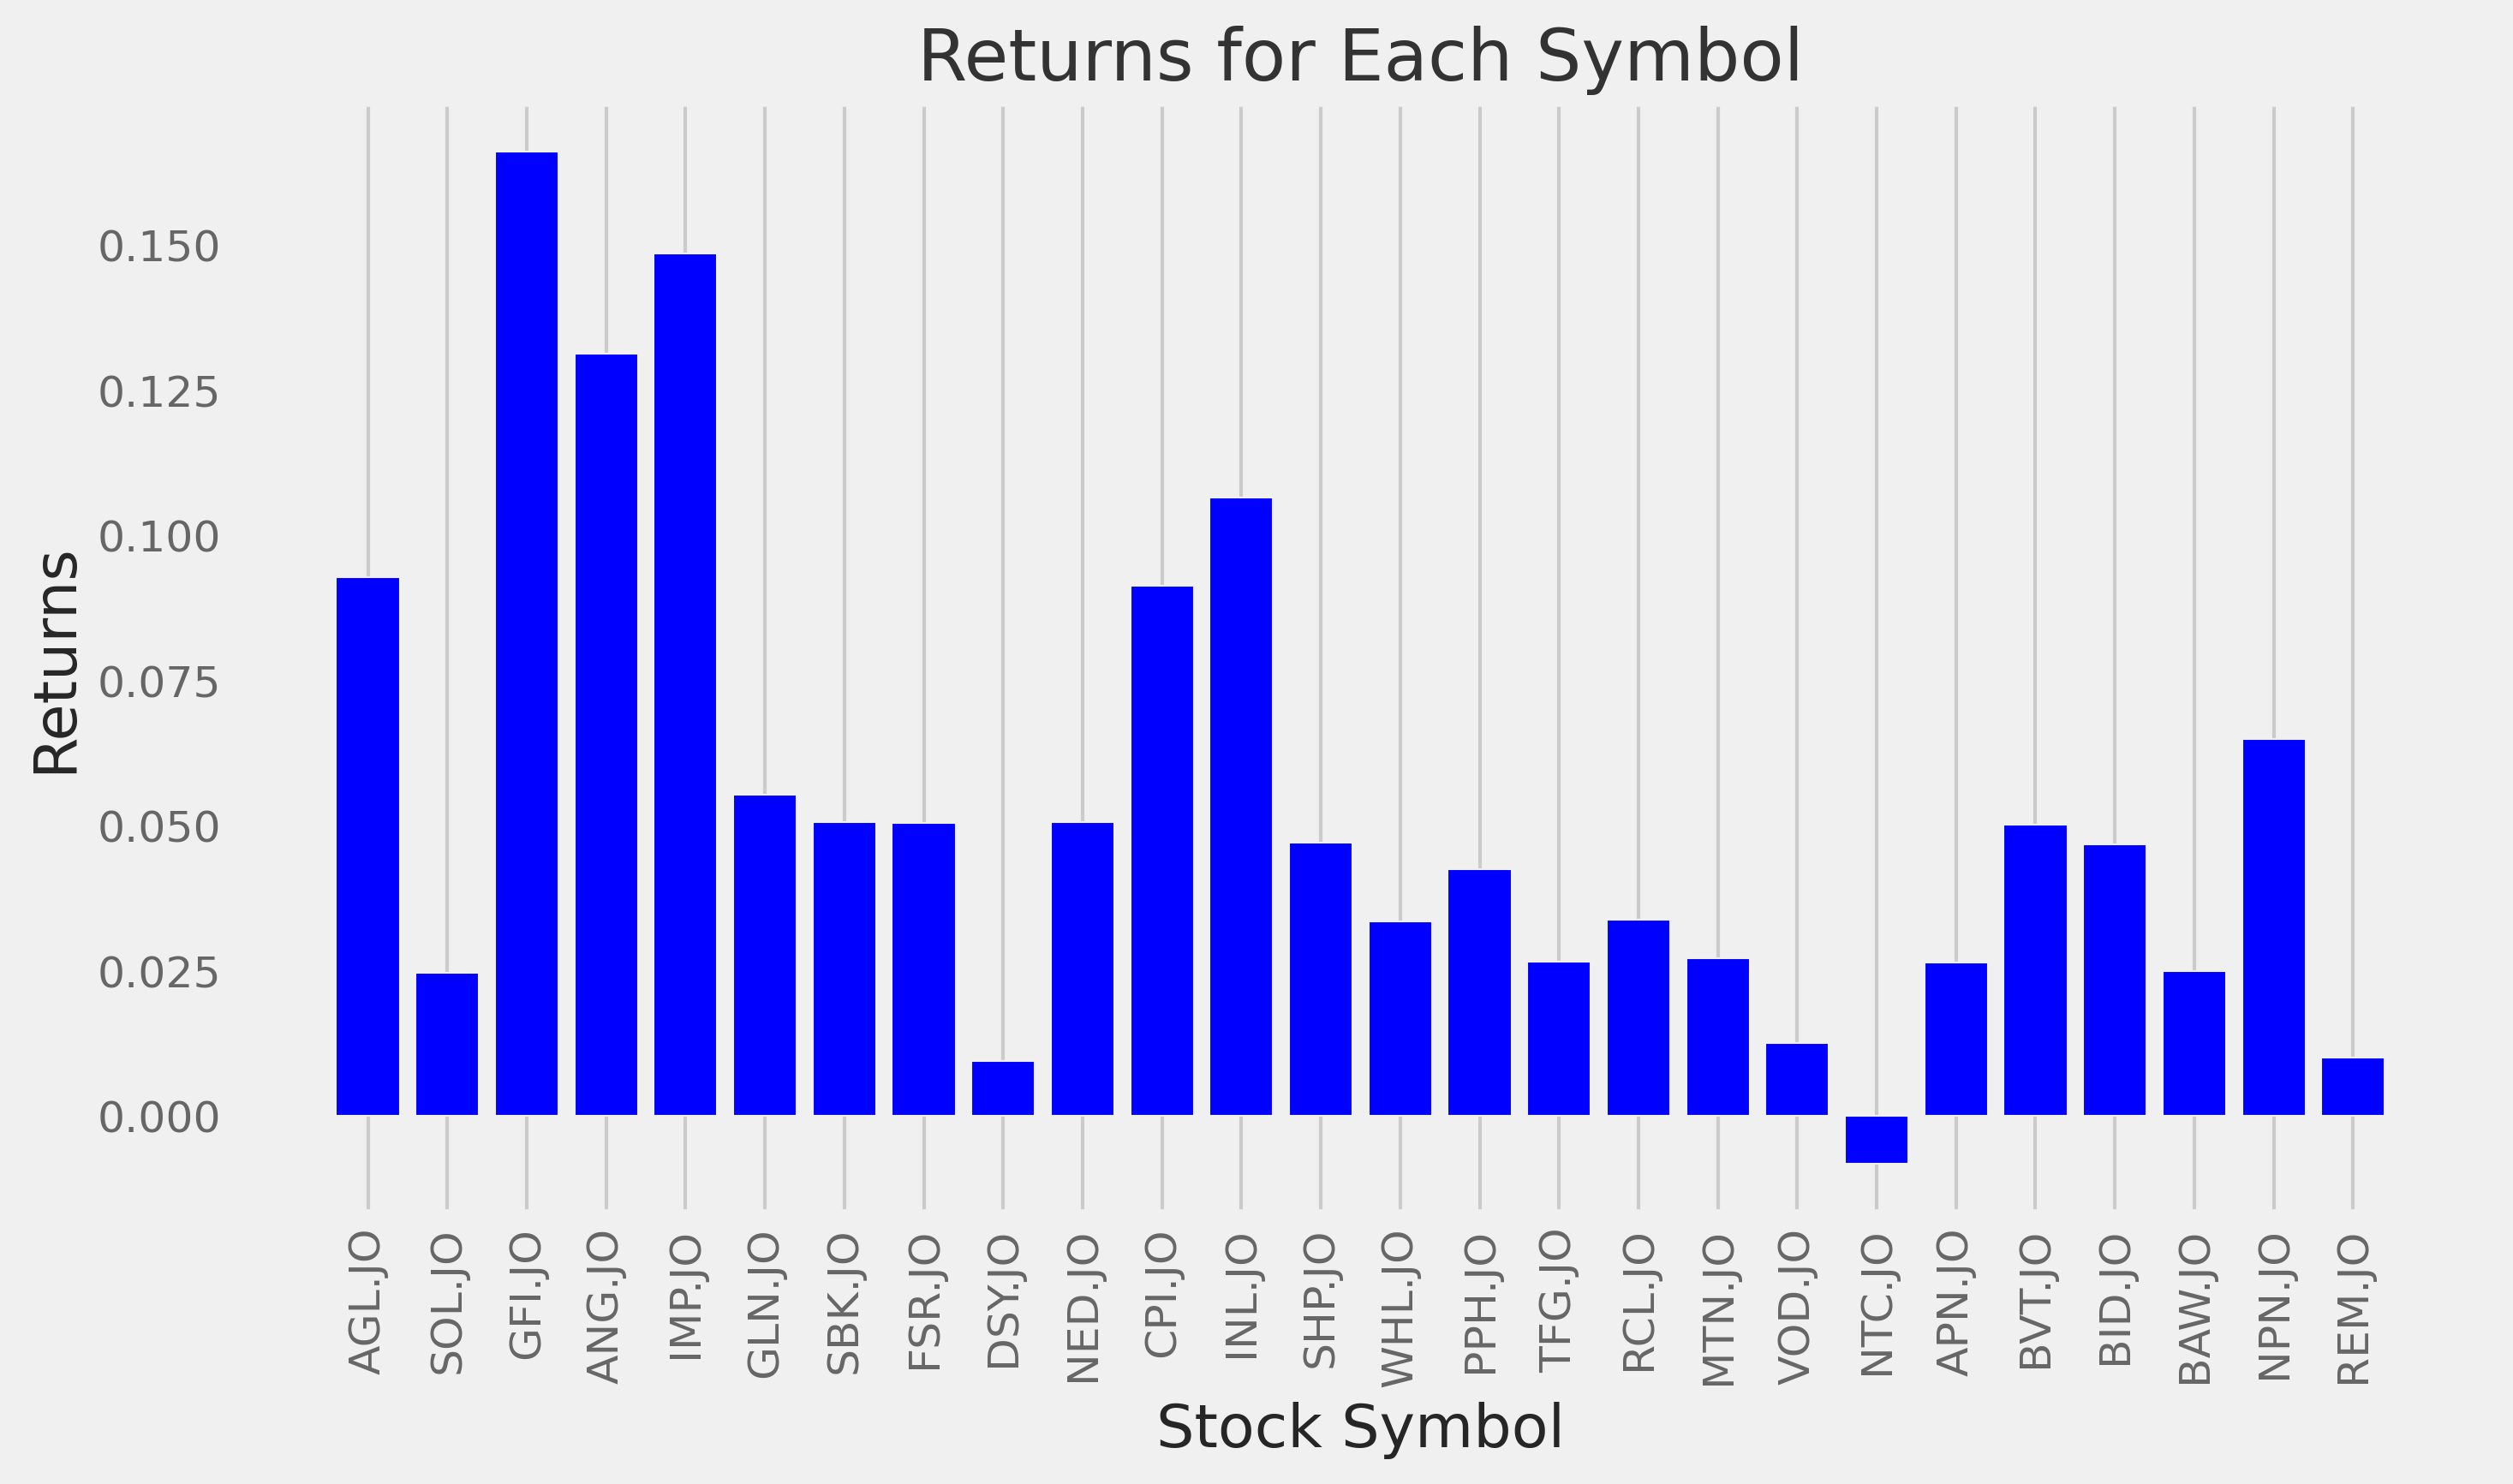

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(Returns.mean().index, Returns.mean().values, color='blue')
plt.title('Returns for Each Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Returns')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('returns_bar_chart.png')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_returns_bar_chart.pdf')
plt.show()

Plotting the stock Variance

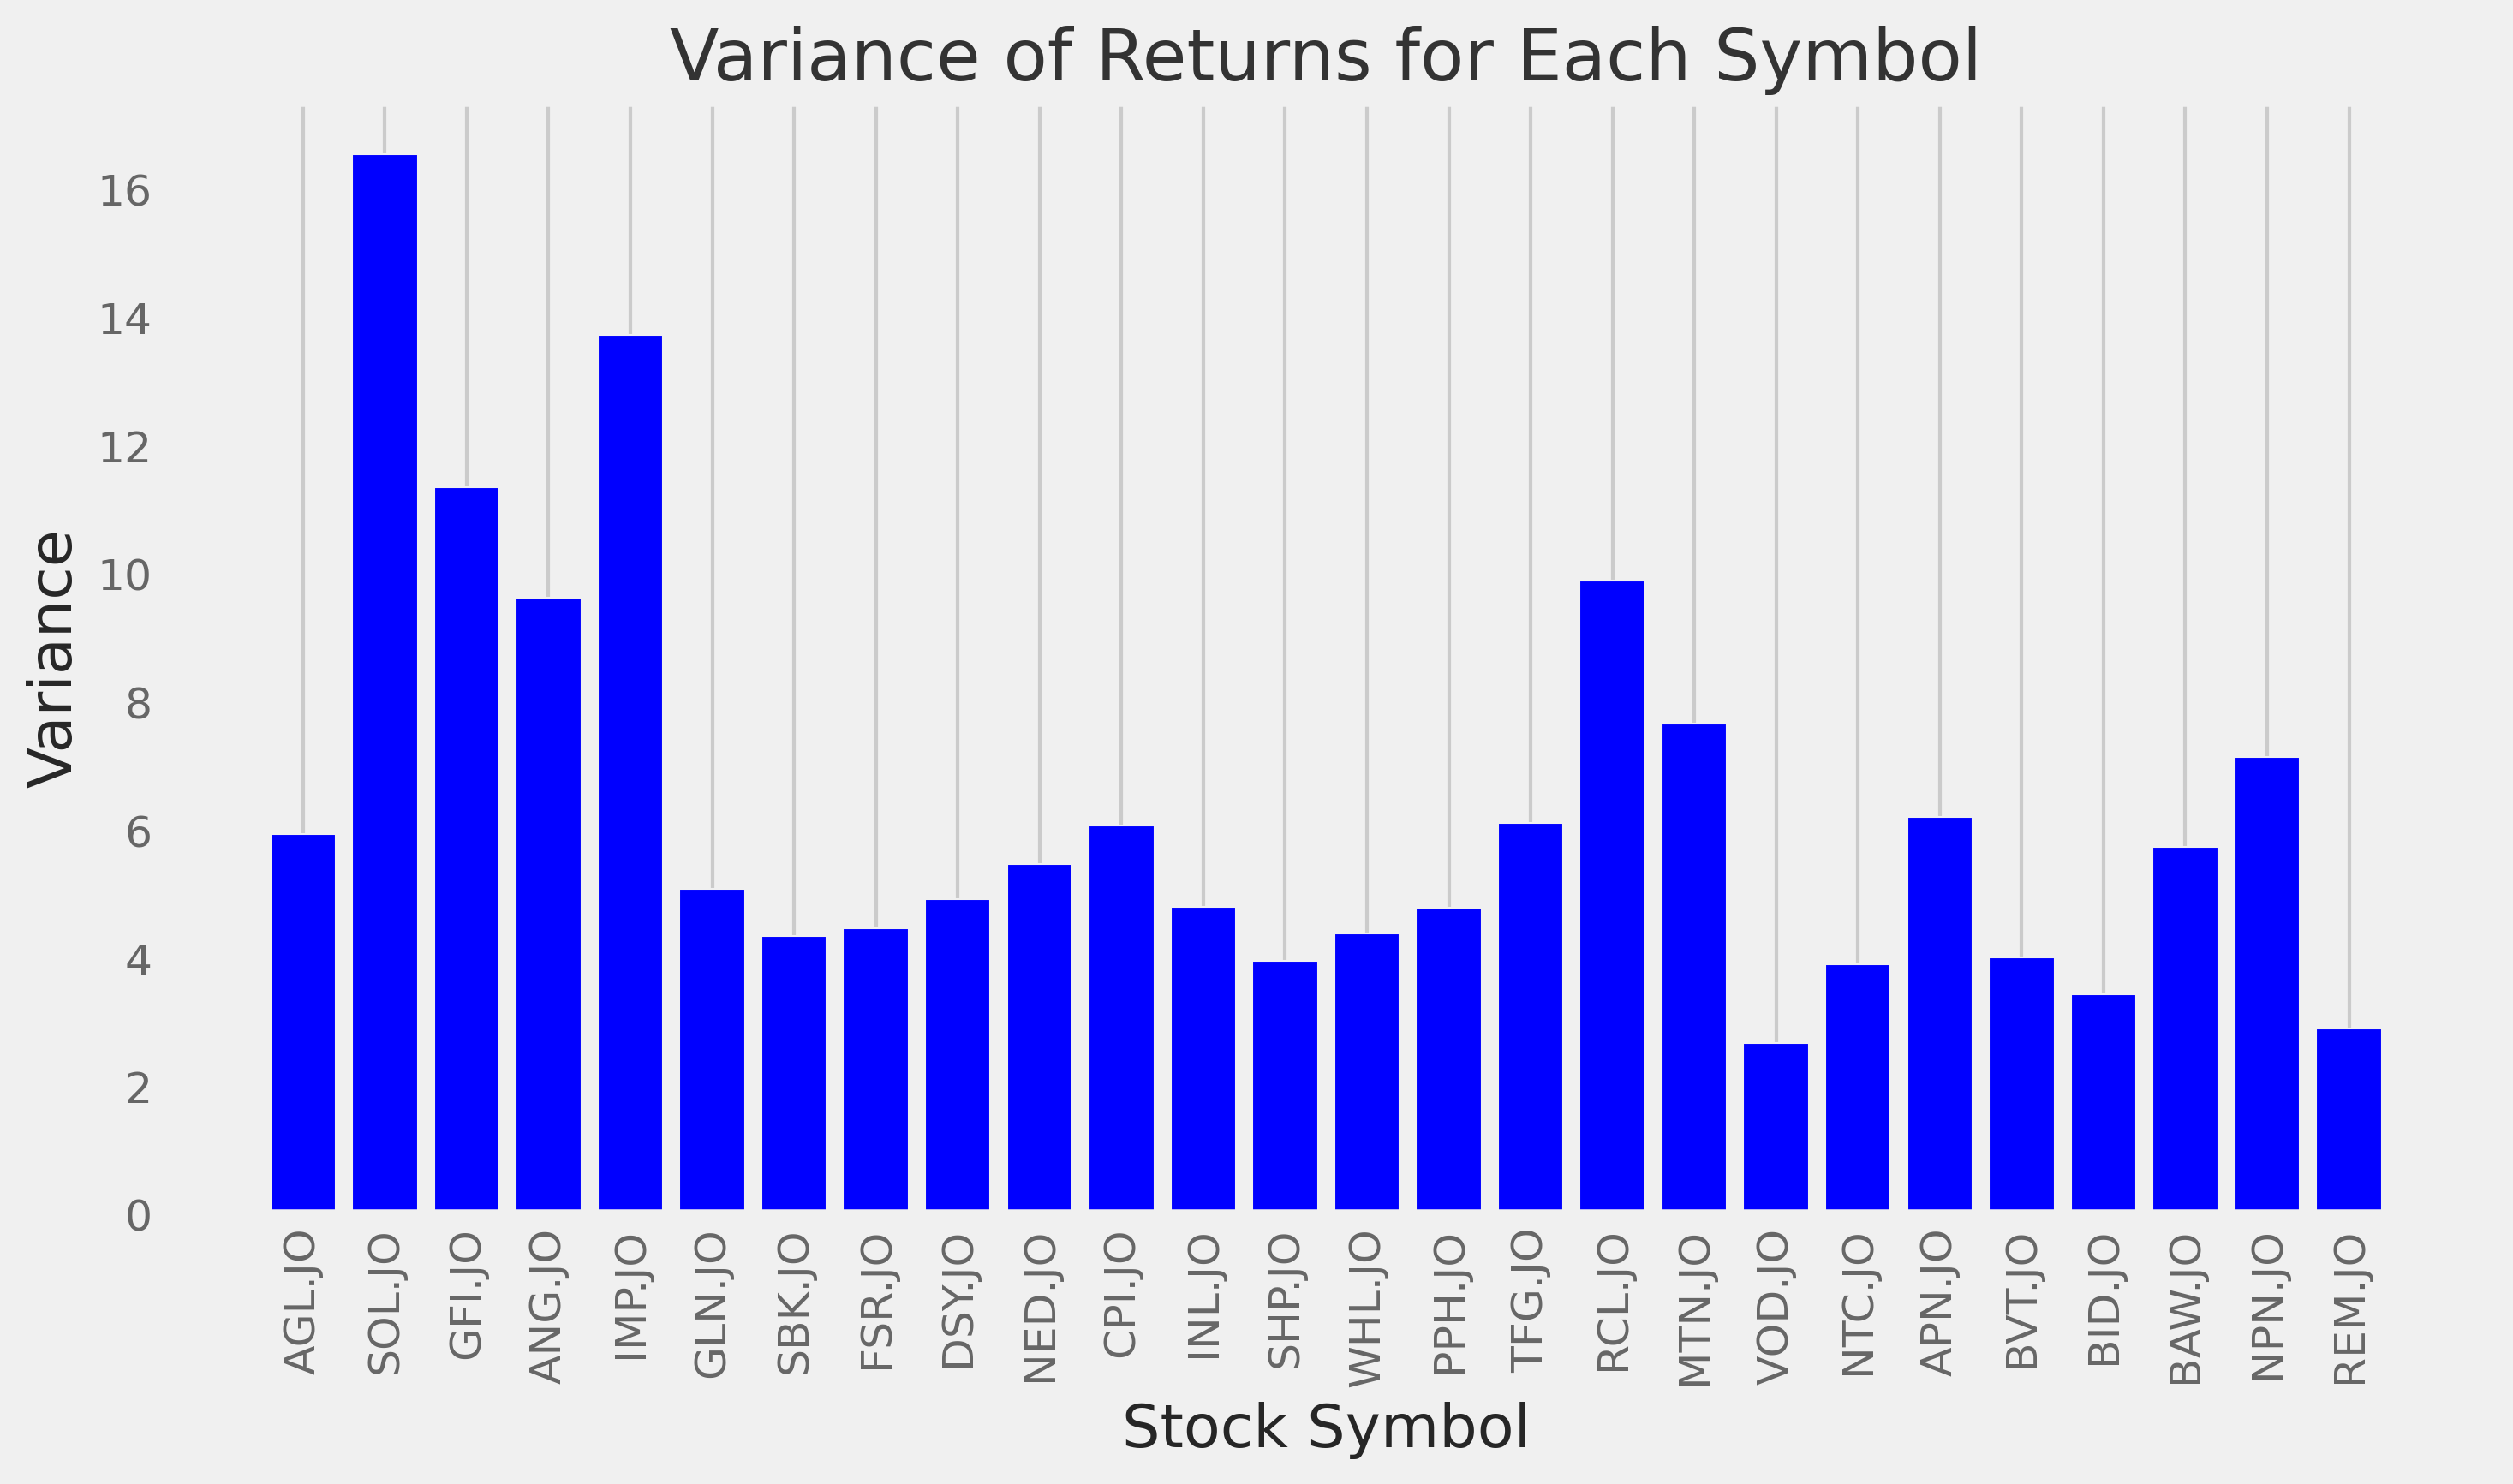

In [ ]:
plt.figure(figsize=(10, 6), dpi =300)
plt.bar(var.index, var.values, color='blue')  # Assuming you want to use the first color in your defined palette
plt.title('Variance of Returns for Each Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Variance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('variance_bar_chart.png', bbox_inches = 'tight')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_variance_bar_chart.pdf')
plt.show()

Calculating and Plotting Stock Volatility (Standard Deviation)

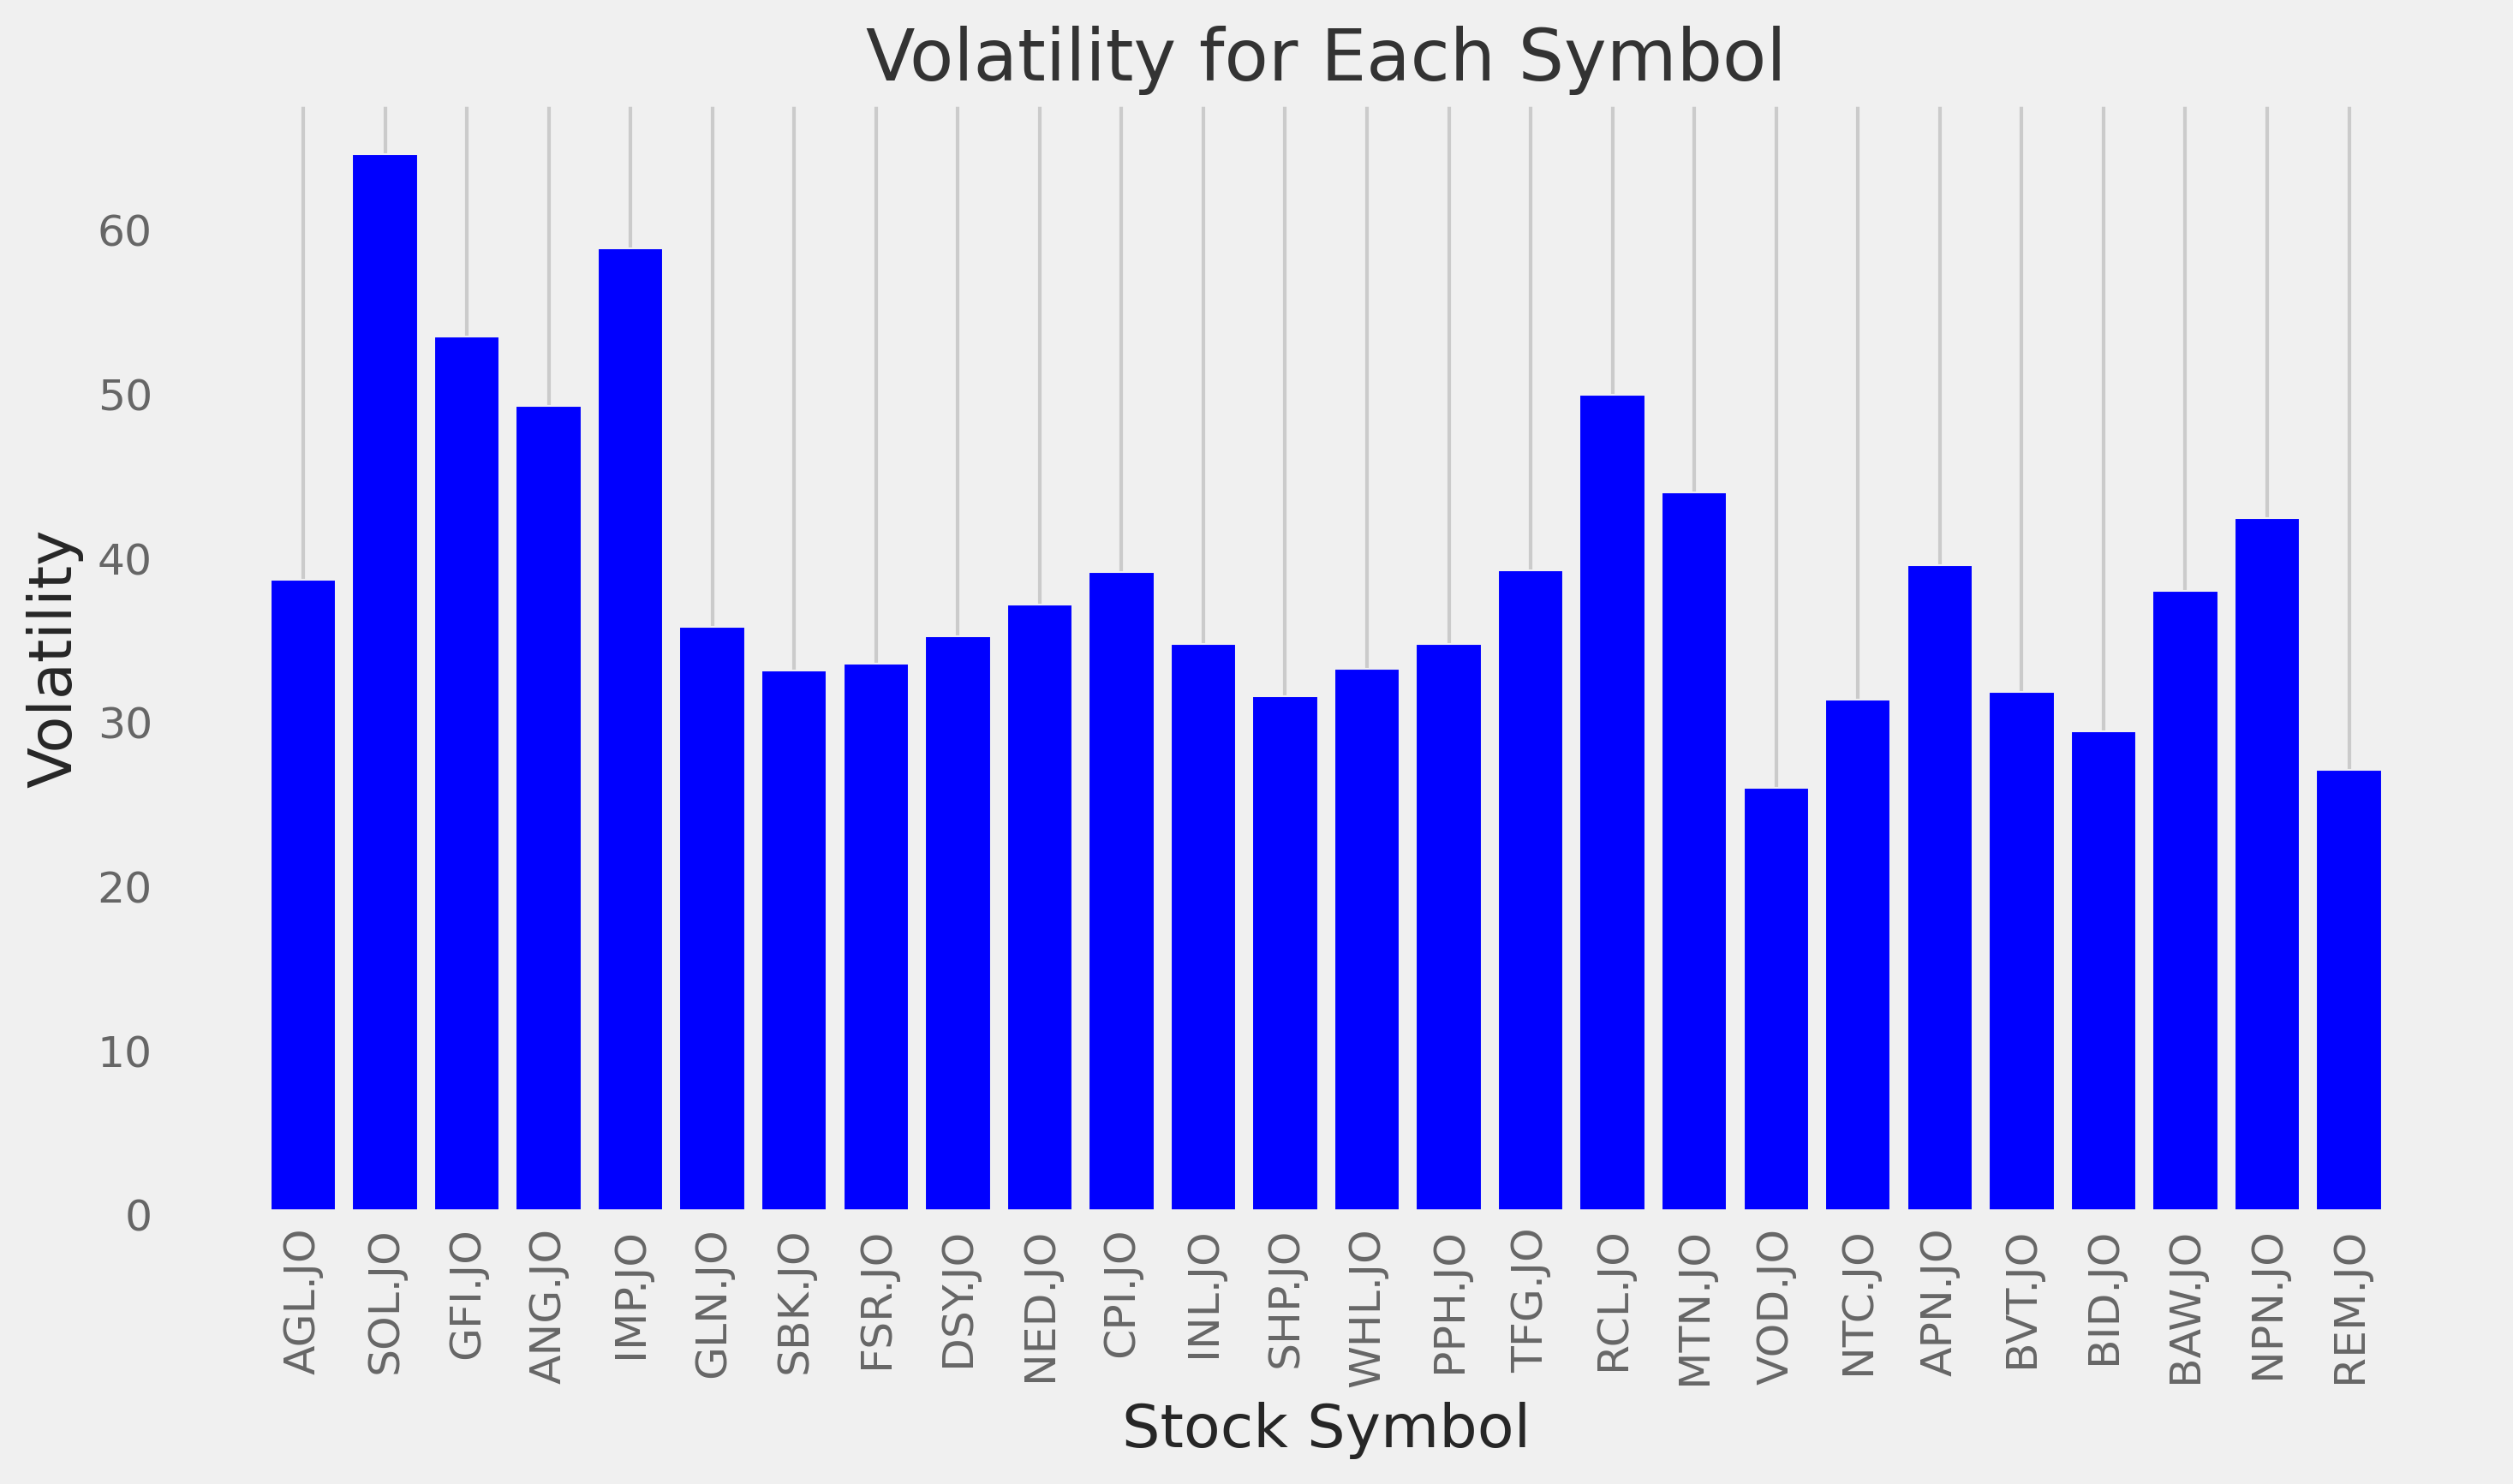

In [ ]:
# Calculate volatility using the provided formula (square root of variance * sqrt(250))
#NOTE: This is annual volatility
volatility = np.sqrt(var * 252)

# Plot bar chart for volatility
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(volatility.index, volatility.values, color='blue')
plt.title('Volatility for Each Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig('volatility_bar_chart.png', bbox_inches = 'tight')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_volatility_bar_chart.pdf')
plt.tight_layout()
plt.show()

Calculating the Correlation between stocks and creating a Correlaion Matrix

In [ ]:
#The correlation between the symbolss
correlation_matrix = Returns.corr()
correlation_matrix.head()

AGL.JO    SOL.JO    GFI.JO    ANG.JO    IMP.JO    GLN.JO    SBK.JO  \
AGL.JO  1.000000  0.421033  0.236670  0.242046  0.477422  0.714626  0.296604   
SOL.JO  0.421033  1.000000  0.037160  0.053641  0.345577  0.460548  0.361893   
GFI.JO  0.236670  0.037160  1.000000  0.832538  0.387840  0.167602 -0.005081   
ANG.JO  0.242046  0.053641  0.832538  1.000000  0.402631  0.144758 -0.010087   
IMP.JO  0.477422  0.345577  0.387840  0.402631  1.000000  0.394637  0.233225   

          FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO    VOD.JO  \
AGL.JO  0.299623  0.283240  0.263342  ...  0.024686  0.267745  0.177371   
SOL.JO  0.313247  0.328151  0.413024  ...  0.048899  0.354224  0.156557   
GFI.JO  0.006320  0.057855 -0.007315  ... -0.016683  0.043605  0.066554   
ANG.JO  0.005374  0.063758 -0.013708  ...  0.006933  0.047224  0.086798   
IMP.JO  0.209074  0.234191  0.237878  ...  0.057892  0.238615  0.129157   

          NTC.JO    APN.JO    BVT.JO    BID.JO    BAW.JO    NPN.JO    REM.JO  
AGL.JO  0.161677  0.139942  0.217435  0.271514  0.274514  0.236591  0.285224  
SOL.JO  0.197390  0.133566  0.258817  0.331565  0.273445  0.109940  0.340803  
GFI.JO  0.016110  0.042290  0.042551  0.096457  0.025324  0.063388  0.049253  
ANG.JO  0.024437  0.041074  0.036980  0.090652  0.026126  0.059083  0.050690  
IMP.JO  0.168560  0.109468  0.197678  0.229101  0.206254  0.187919  0.235075  

[5 rows x 26 columns]

Convert the Coprrelation matrix to Latex

In [ ]:
print(correlation_matrix.to_latex(index=True, float_format="{:.4f}".format))

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & AGL.JO & SOL.JO & GFI.JO & ANG.JO & IMP.JO & GLN.JO & SBK.JO & FSR.JO & DSY.JO & NED.JO & CPI.JO & INL.JO & SHP.JO & WHL.JO & PPH.JO & TFG.JO & RCL.JO & MTN.JO & VOD.JO & NTC.JO & APN.JO & BVT.JO & BID.JO & BAW.JO & NPN.JO & REM.JO \\
\midrule
AGL.JO & 1.0000 & 0.4210 & 0.2367 & 0.2420 & 0.4774 & 0.7146 & 0.2966 & 0.2996 & 0.2832 & 0.2633 & 0.2418 & 0.4170 & 0.1396 & 0.2209 & 0.1738 & 0.2445 & 0.0247 & 0.2677 & 0.1774 & 0.1617 & 0.1399 & 0.2174 & 0.2715 & 0.2745 & 0.2366 & 0.2852 \\
SOL.JO & 0.4210 & 1.0000 & 0.0372 & 0.0536 & 0.3456 & 0.4605 & 0.3619 & 0.3132 & 0.3282 & 0.4130 & 0.2019 & 0.3843 & 0.1484 & 0.2474 & 0.2341 & 0.2756 & 0.0489 & 0.3542 & 0.1566 & 0.1974 & 0.1336 & 0.2588 & 0.3316 & 0.2734 & 0.1099 & 0.3408 \\
GFI.JO & 0.2367 & 0.0372 & 1.0000 & 0.8325 & 0.3878 & 0.1676 & -0.0051 & 0.0063 & 0.0579 & -0.0073 & 0.0885 & 0.0624 & 0.0260 & 0.0500 & 0.0050 & 0.0125 & -0.0167 & 0.0436 & 0.0666 & 0.0161 & 0.0423 & 0.0426 & 0

Create a Correlation Heatmap

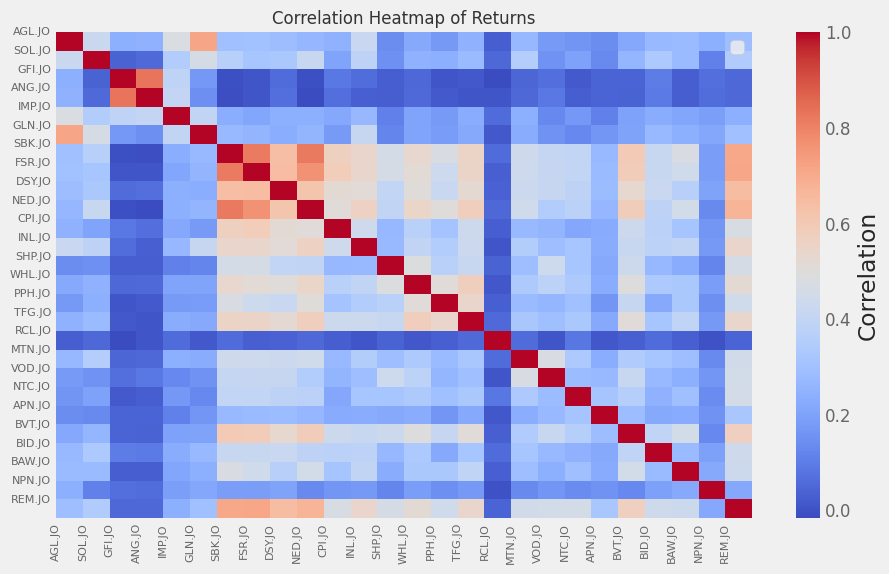

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation'})

# plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap of Returns', fontsize=12)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='upper right')
plt.savefig('Correlation Heatmap1.png')
plt.show()

Annualize Returns

In [ ]:
# Annual_returns_mean = df.resample('Y').mean()
Annual_returns_last = df2.resample('Y').last()
Annual_returns = Annual_returns_last.mean()
Annual_returns.to_frame().T

AGL.JO  SOL.JO   GFI.JO    ANG.JO    IMP.JO    GLN.JO    SBK.JO  \
0 -0.357707 -0.0015 -1.54237 -0.090982  0.810037 -0.558079  0.005792   

     FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO    VOD.JO    NTC.JO  \
0  0.409359 -0.034137  0.154983  ... -0.573551 -0.083677  0.368979  0.329852   

     APN.JO    BVT.JO    BID.JO    BAW.JO    NPN.JO    REM.JO  
0 -0.426607  0.171254 -0.560404 -0.950991  0.322162  0.301759  

[1 rows x 26 columns]

Plotting Final Returns for each stock

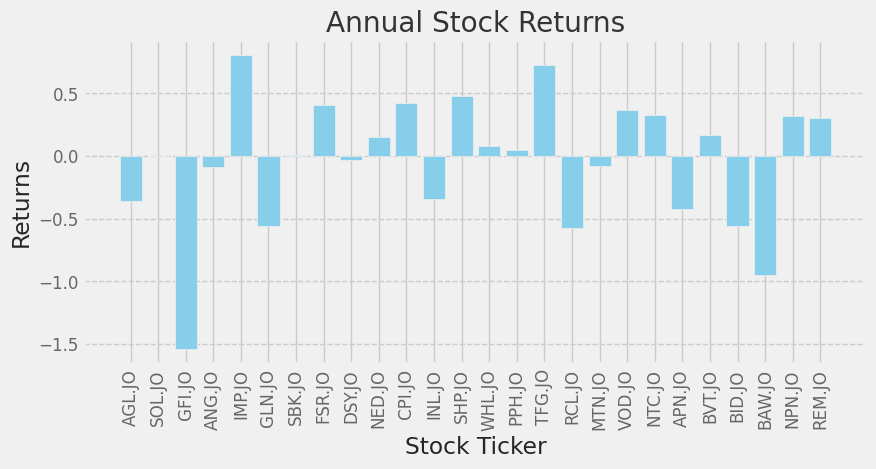

In [ ]:
import matplotlib.pyplot as plt

# Data from provided table
stocks = ['AGL.JO', 'SOL.JO', 'GFI.JO', 'ANG.JO', 'IMP.JO', 'GLN.JO', 'SBK.JO', 'FSR.JO', 'DSY.JO', 'NED.JO', 'CPI.JO', 'INL.JO',
          'SHP.JO', 'WHL.JO', 'PPH.JO', 'TFG.JO', 'RCL.JO', 'MTN.JO', 'VOD.JO', 'NTC.JO', 'APN.JO', 'BVT.JO', 'BID.JO', 'BAW.JO',
          'NPN.JO', 'REM.JO']
returns = [-0.3577, -0.0015, -1.5424, -0.0910, 0.8100, -0.5581, 0.0058, 0.4094, -0.0341, 0.1550, 0.4225, -0.3409, 0.4818, 0.0798,
           0.0475, 0.7281, -0.5736, -0.0837, 0.3690, 0.3299, -0.4266, 0.1713, -0.5604, -0.9510, 0.3222, 0.3018]

# Plotting the returns
plt.figure(figsize=(9, 4))
plt.bar(stocks, returns, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Stock Ticker')
plt.ylabel('Returns')
plt.title('Annual Stock Returns')
plt.grid(axis='y', linestyle='--')
plt.savefig('Annual Returns.png', bbox_inches = 'tight')
plt.show()


Portfolio Expected Returns

In [ ]:
# Define the number of equities
num_equities = 26

# Calculate equal weights
equal_weights = np.full(num_equities, 1 / num_equities)


# Calculate expected return for each equity
expected_returns = Annual_returns.mean()  #These are daily returns fo each equity

# Calculate portfolio expected return
portfolio_expected_return = np.dot(expected_returns, equal_weights)

print("Portfolio Expected Return:", portfolio_expected_return)


Portfolio Expected Return: [-0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206
 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206
 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206
 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206 -0.00131206
 -0.00131206 -0.00131206]


Expected Portfolio Variance

In [ ]:
port_var = (covariance_matrix.mul(equal_weights, axis=0)
                                      .mul(equal_weights, axis=1)
                                      .sum()
                                      .sum())

print("Portfolio Variance:", port_var)

Portfolio Variance: 1.7148508497475636


Portfolio Volatility

In [ ]:
Portfolio_volatility = port_var**0.5
Portfolio_volatility

1.3095231383017116

The Efficient Frontier Portfolios

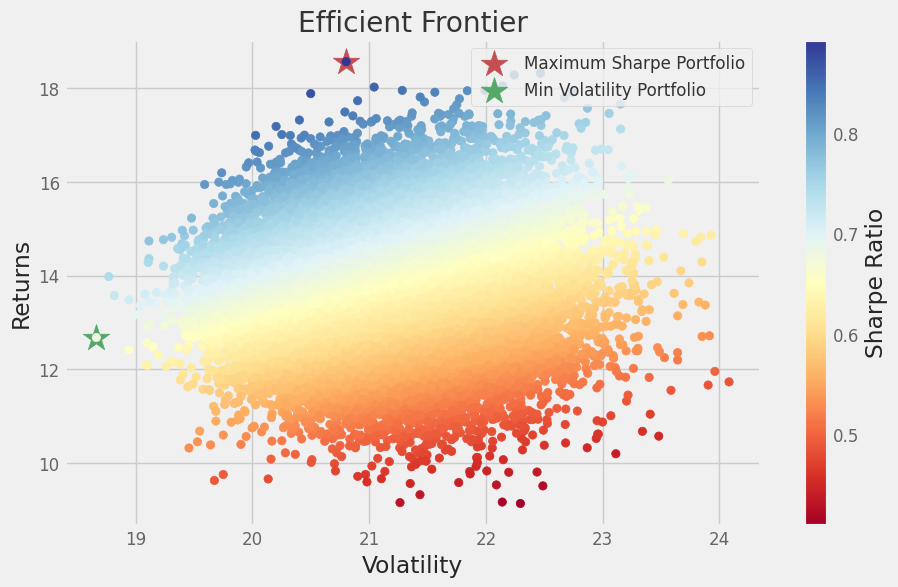

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#list of stocks in portfolio
stocks = ['AGL.JO', 'SOL.JO', 'NPN.JO', 'MTN.JO', 'SBK.JO', 'FSR.JO', 'SHP.JO',
       'BVT.JO', 'DSY.JO', 'VOD.JO', 'GFI.JO', 'REM.JO', 'NED.JO', 'BID.JO',
       'WHL.JO', 'APN.JO', 'PPH.JO', 'CPI.JO', 'INL.JO', 'ANG.JO', 'RCL.JO',
       'TFG.JO', 'IMP.JO', 'NTC.JO', 'BAW.JO', 'GLN.JO']
#download daily price data for each of the stocks in the portfolio
# data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
np.random.seed(42)

data = df2
# data.sort_index(inplace=True)
#convert daily stock prices into daily returns
returns1 = data #.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns1.mean()
cov_matrix = returns1.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000

results = np.zeros((3+len(stocks),num_portfolios))
len(results)

num_stocks = 26

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(26))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)

    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_vol = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_vol
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
columns = ['ret', 'vol', 'sharpe'] + stocks  # Combine the first three with the stock names
results_frame = pd.DataFrame(results.T, columns=columns)

# results_frame = pd.DataFrame(results.T, columns=['ret','stdev','sharpe',stocks)

#locate position of portfolio with highest Sharpe Ratioom For
max_sharpe_port_1 =  results_frame.iloc[results_frame['sharpe'].idxmax()]

#Here is the portfolio with the lowest Sharpe Ratio
min_sharpe_port =  results_frame.iloc[results_frame['sharpe'].idxmin()]

#locate positon of portfolio with minimum standard deviationom For
min_vol_port_1 = results_frame.iloc[results_frame['vol'].idxmin()]
#create scatter plot coloured by Sharpe Ratio

plt.figure(figsize=(10, 6))
#plot red star to highlight position of portfolio with highest Sharpe Ratio
# plt.scatter(portfolios['Volatility'], portfolios['Returns'], s=10, alpha=0.3, label='Portfolios')
plt.scatter(max_sharpe_port_1[1],max_sharpe_port_1[0],marker='*',color='r',s=400, label= 'Maximum Sharpe Portfolio')
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port_1[1],min_vol_port_1[0],marker='*',color='g',s=400, label = 'Min Volatility Portfolio');
plt.scatter(results_frame.vol,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
# plt.legend()
plt.legend(loc='upper right')
# plt.grid(axis='y', linestyle='--')

plt.savefig('Random_Weights_Portfolio.png', bbox_inches = 'tight')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Random Portfolio.pdf')

Extracting the Minimum Volatility Portfolio and convert the details to latex

In [ ]:
#Extract the min_vol_portfolio
min_vol_port_1 = min_vol_port_1.to_frame()

#Print the min_vol_portfolio to Latex
print(min_vol_port_1.to_latex(index=True, float_format="{:.4f}".format))

\begin{tabular}{lr}
\toprule
 & 6656 \\
\midrule
ret & 12.6784 \\
vol & 18.6621 \\
sharpe & 0.6794 \\
AGL.JO & 0.0008 \\
SOL.JO & 0.0003 \\
NPN.JO & 0.0737 \\
MTN.JO & 0.0424 \\
SBK.JO & 0.0027 \\
FSR.JO & 0.0764 \\
SHP.JO & 0.0423 \\
BVT.JO & 0.0355 \\
DSY.JO & 0.0026 \\
VOD.JO & 0.0324 \\
GFI.JO & 0.0015 \\
REM.JO & 0.0132 \\
NED.JO & 0.0464 \\
BID.JO & 0.0393 \\
WHL.JO & 0.0064 \\
APN.JO & 0.0038 \\
PPH.JO & 0.0595 \\
CPI.JO & 0.0171 \\
INL.JO & 0.0860 \\
ANG.JO & 0.0533 \\
RCL.JO & 0.0136 \\
TFG.JO & 0.0679 \\
IMP.JO & 0.0715 \\
NTC.JO & 0.0573 \\
BAW.JO & 0.0664 \\
GLN.JO & 0.0877 \\
\bottomrule
\end{tabular}



Extracting the Max_Sharpe_Portfolio

In [ ]:
# Extracting the Max_Sharpe_Portfolio
max_sharpe_port_1 = max_sharpe_port_1.to_frame()

#Printing the max_sharpe_porfolio to Latex
print(max_sharpe_port_1.to_latex(index=True, float_format="{:.4f}".format))

\begin{tabular}{lr}
\toprule
 & 14725 \\
\midrule
ret & 18.5724 \\
vol & 20.8022 \\
sharpe & 0.8928 \\
AGL.JO & 0.0860 \\
SOL.JO & 0.0019 \\
NPN.JO & 0.0847 \\
MTN.JO & 0.0808 \\
SBK.JO & 0.0480 \\
FSR.JO & 0.0124 \\
SHP.JO & 0.0334 \\
BVT.JO & 0.0345 \\
DSY.JO & 0.0264 \\
VOD.JO & 0.0024 \\
GFI.JO & 0.0744 \\
REM.JO & 0.0363 \\
NED.JO & 0.0667 \\
BID.JO & 0.0432 \\
WHL.JO & 0.0128 \\
APN.JO & 0.0116 \\
PPH.JO & 0.0199 \\
CPI.JO & 0.0142 \\
INL.JO & 0.0315 \\
ANG.JO & 0.0053 \\
RCL.JO & 0.0284 \\
TFG.JO & 0.0518 \\
IMP.JO & 0.0598 \\
NTC.JO & 0.0622 \\
BAW.JO & 0.0647 \\
GLN.JO & 0.0069 \\
\bottomrule
\end{tabular}



Comparison of Portfolio Weights

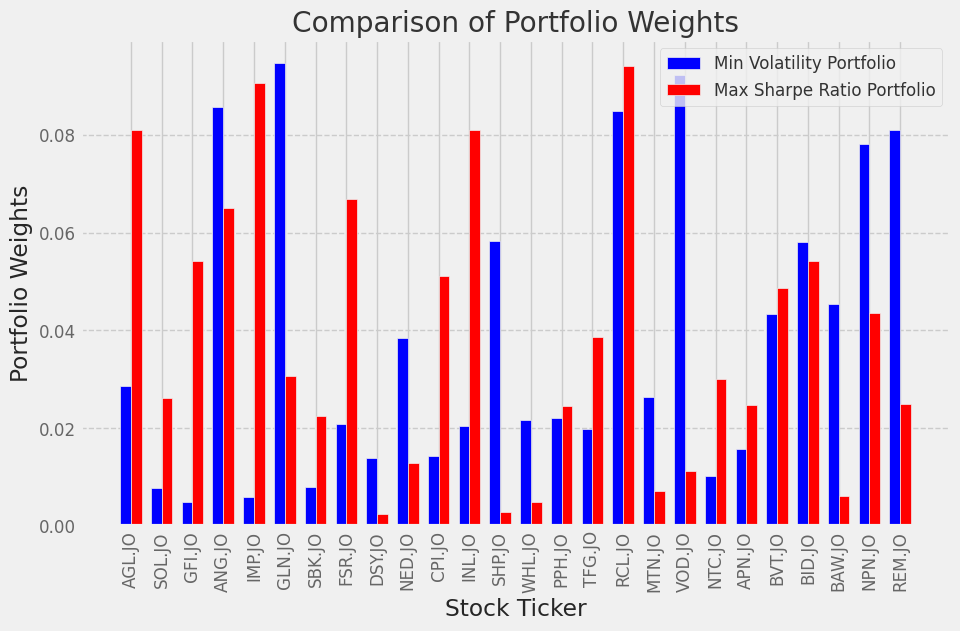

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided LaTeX table
tickers = ['AGL.JO', 'SOL.JO', 'GFI.JO', 'ANG.JO', 'IMP.JO', 'GLN.JO', 'SBK.JO', 'FSR.JO', 'DSY.JO', 'NED.JO', 'CPI.JO', 'INL.JO',
           'SHP.JO', 'WHL.JO', 'PPH.JO', 'TFG.JO', 'RCL.JO', 'MTN.JO', 'VOD.JO', 'NTC.JO', 'APN.JO', 'BVT.JO', 'BID.JO', 'BAW.JO',
           'NPN.JO', 'REM.JO']

min_vol_weights = [0.0286, 0.0078, 0.0049, 0.0856, 0.0058, 0.0947, 0.0079, 0.0209, 0.0138, 0.0384, 0.0142, 0.0205, 0.0583, 0.0217,
                   0.0221, 0.0198, 0.0848, 0.0264, 0.0922, 0.0102, 0.0157, 0.0434, 0.0581, 0.0454, 0.0782, 0.0809]

max_sharpe_weights = [0.0809, 0.0261, 0.0542, 0.0651, 0.0907, 0.0307, 0.0225, 0.0669, 0.0024, 0.0129, 0.0512, 0.0809, 0.0028, 0.0048,
                      0.0245, 0.0387, 0.0941, 0.0071, 0.0113, 0.03, 0.0248, 0.0486, 0.0541, 0.0062, 0.0435, 0.0249]

# Plotting the weights comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each portfolio's weights
width = 0.35
x = range(len(tickers))

ax.bar(x, min_vol_weights, width, label='Min Volatility Portfolio', color='blue')
ax.bar([i + width for i in x], max_sharpe_weights, width, label='Max Sharpe Ratio Portfolio', color='red')

# Labels and Title
ax.set_xlabel('Stock Ticker')
ax.set_ylabel('Portfolio Weights')
ax.set_title('Comparison of Portfolio Weights')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(tickers, rotation=90)
ax.legend()
plt.grid(axis='y', linestyle='--')
plt.savefig('Portfolio Weights Comparison.png', bbox_inches = 'tight')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Portfolio Weights Comparison.pdf'
plt.show()

Efficient Frontier Portfolio with Equal Weights

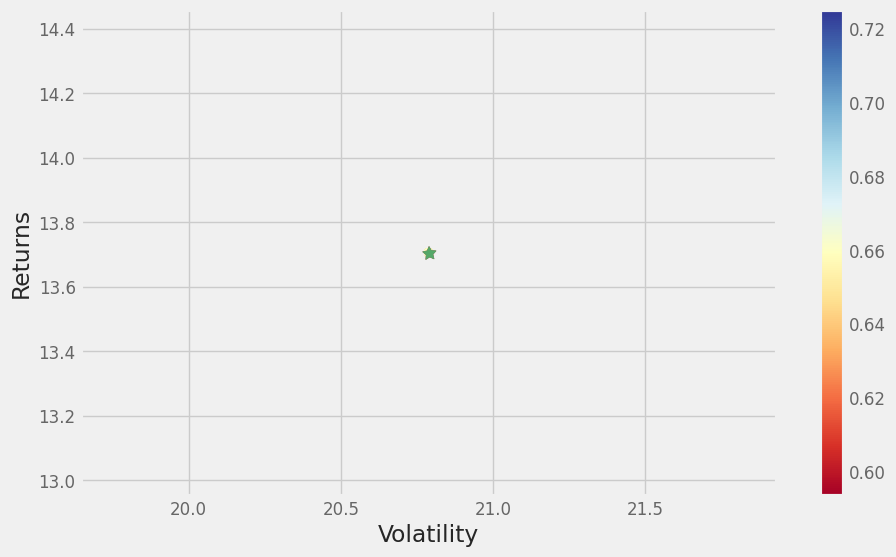

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt0388

#list of stocks in portfolio
stocks = ['AGL.JO', 'SOL.JO', 'NPN.JO', 'MTN.JO', 'SBK.JO', 'FSR.JO', 'SHP.JO',
       'BVT.JO', 'DSY.JO', 'VOD.JO', 'GFI.JO', 'REM.JO', 'NED.JO', 'BID.JO',
       'WHL.JO', 'APN.JO', 'PPH.JO', 'CPI.JO', 'INL.JO', 'ANG.JO', 'RCL.JO',
       'TFG.JO', 'IMP.JO', 'NTC.JO', 'BAW.JO', 'GLN.JO']
#download daily price data for each of the stocks in the portfolio
# data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
data = df2
# data.sort_index(inplace=True)
#convert daily stock prices into daily returns
returns1 = data #.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns1.mean()
cov_matrix = returns1.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000

results = np.zeros((3+len(stocks),num_portfolios))
len(results)

# Crwating a copy of weights distribution
num_stocks = 26

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(
        [
            1/26, 1/26, 1/26,1/26, 1/26, 1/26, 1/26, 1/26, 1/26,
             1/26, 1/26, 1/26,1/26, 1/26, 1/26, 1/26, 1/26,
             1/26, 1/26, 1/26, 1/26,1/26, 1/26, 1/26, 1/26, 1/26
        ]
    )
    # weights /= np.sum(weights)

    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    # portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
columns = ['ret', 'vol', 'sharpe'] + stocks  # Combine the first three with the stock names
results_frame = pd.DataFrame(results.T, columns=columns)

# results_frame = pd.DataFrame(results.T, columns=['ret','stdev','sharpe',stocks)

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port =  results_frame.iloc[results_frame['sharpe'].idxmax()]

#Here is the portfolio with the lowest Sharpe Ratio
min_sharpe_port =  results_frame.iloc[results_frame['sharpe'].idxmin()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['vol'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.vol,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,4),color='r',s=100)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,4),color='g',s=100);
plt.savefig('Uniform_Weights_Portfolio.png')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Uniform Portfolio.pdf')

Time Series of all Stocks combined

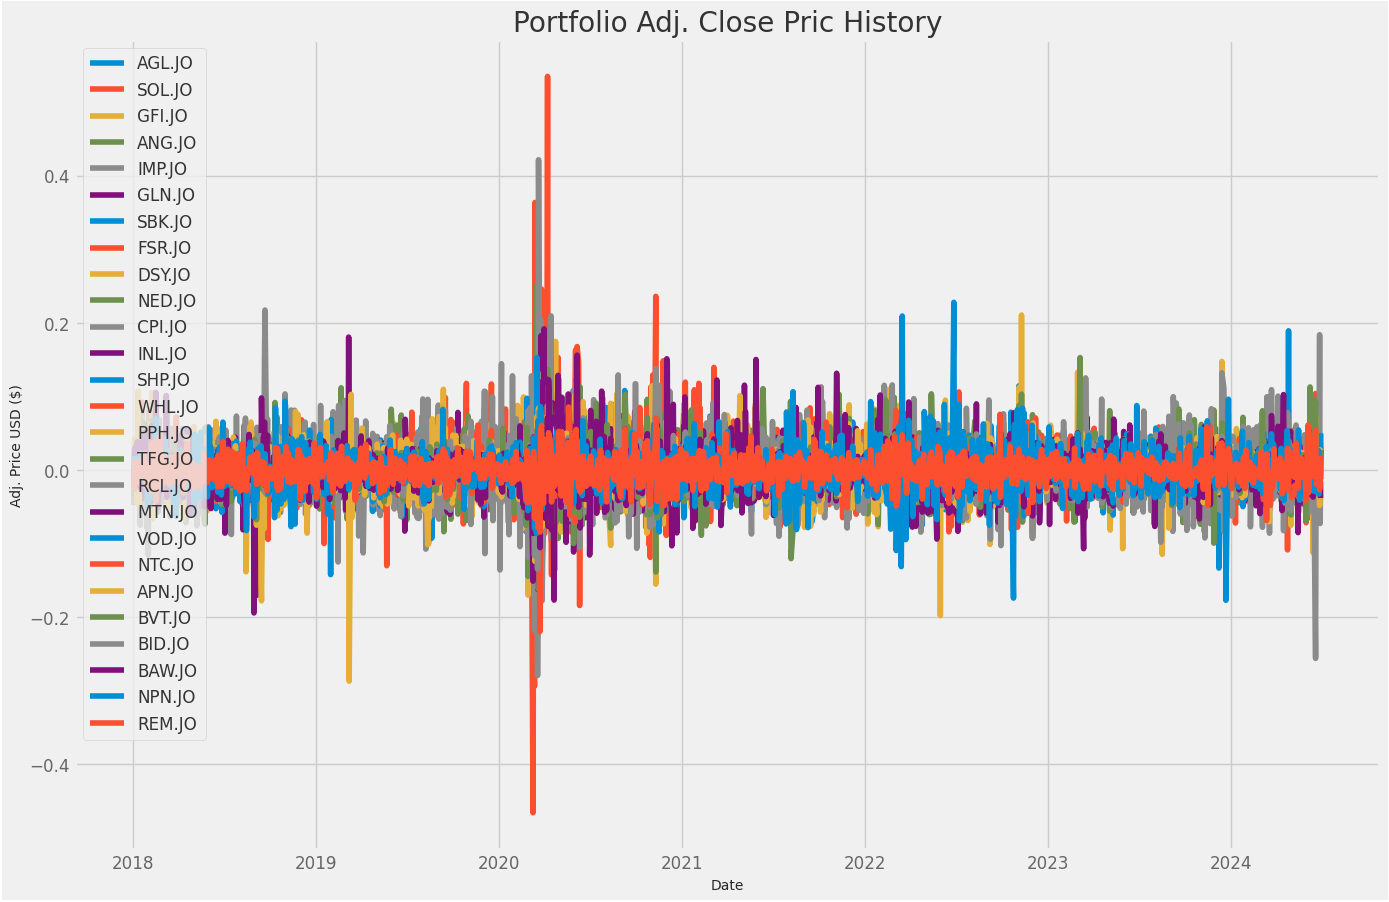

In [ ]:
# Visualize tje stock/portfolio

title="Portfolio Adj. Close Pric History"

#Get the stocks
stocks = df

#Create and plot the graph
plt.figure(figsize=(15, 10), linewidth=1.5)
for c in stocks.columns.values:
    plt.plot(stocks[c], label=c)

plt.title(title)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Adj. Price USD ($)", fontsize=10)
plt.legend(stocks.columns.values, loc="upper left")
plt.savefig('Portfolio Adj. Close Pric History.png')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Portfolio Adj. Close Pric History.pdf')
plt.show()

Plotting Individual Time Series for Stocks Returns

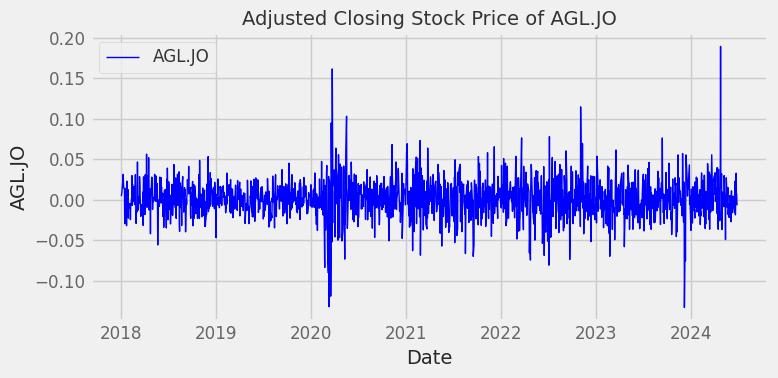

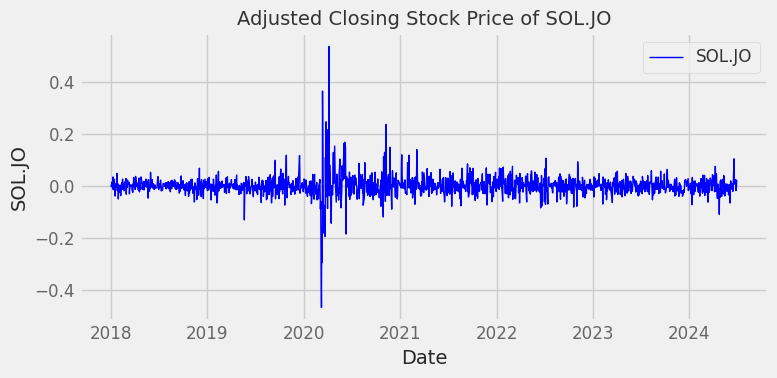

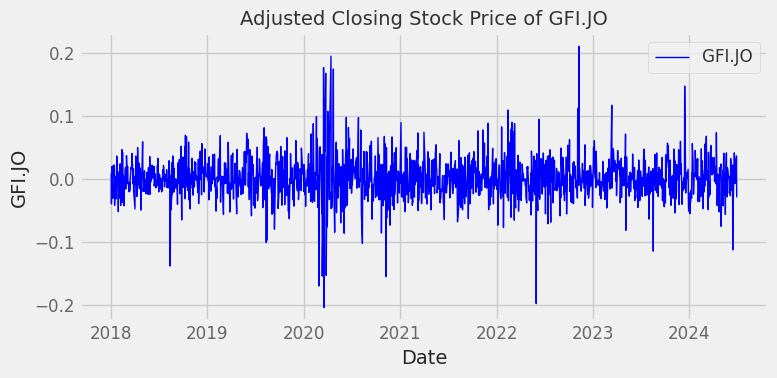

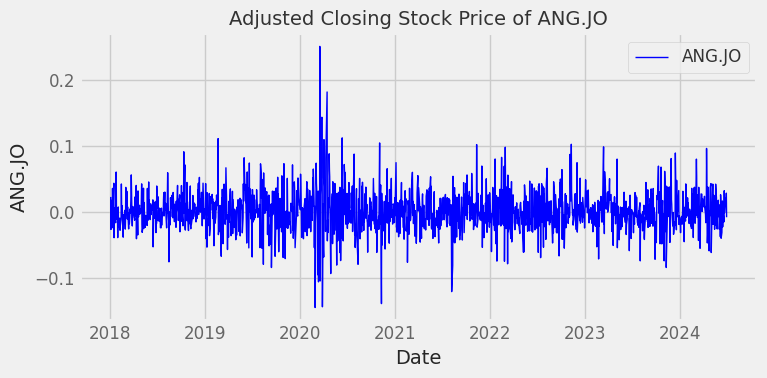

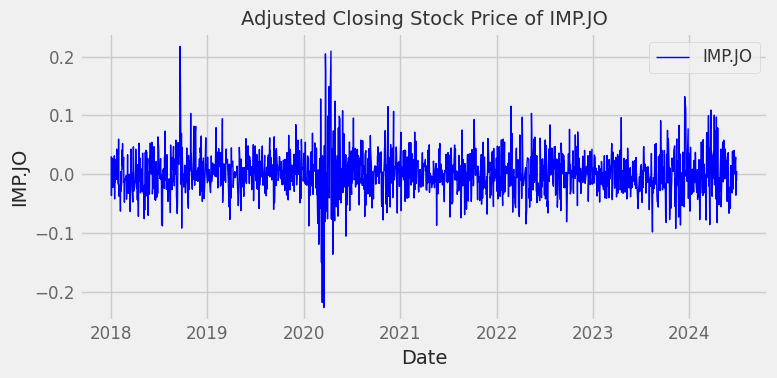

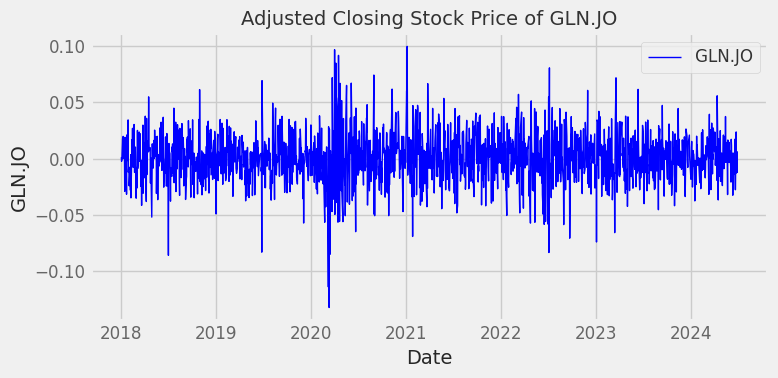

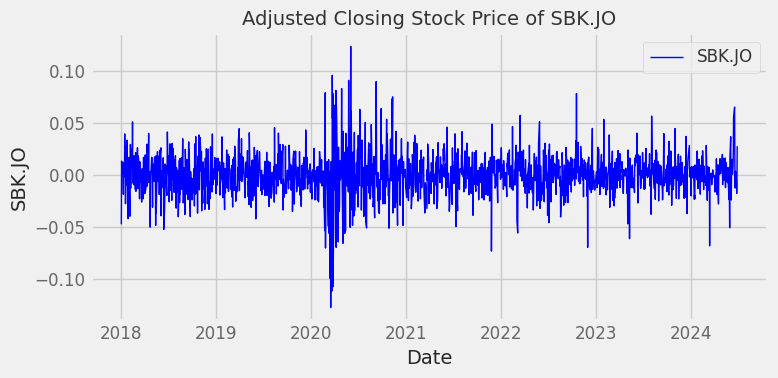

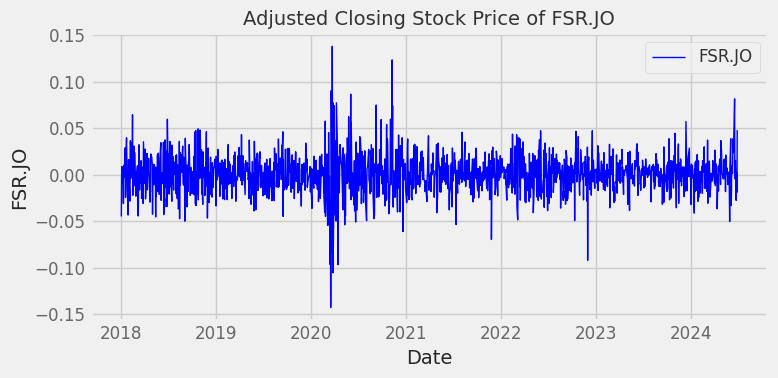

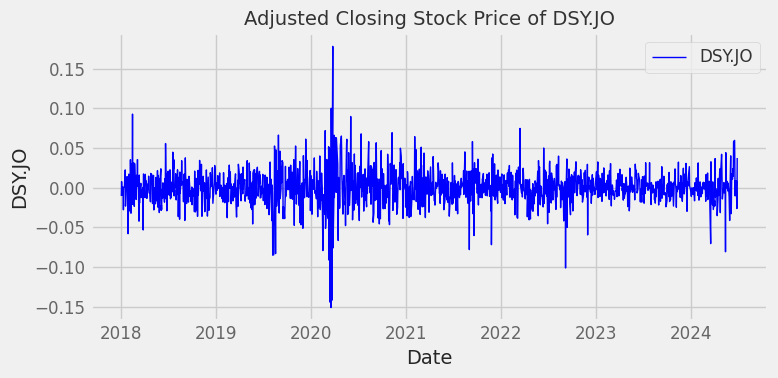

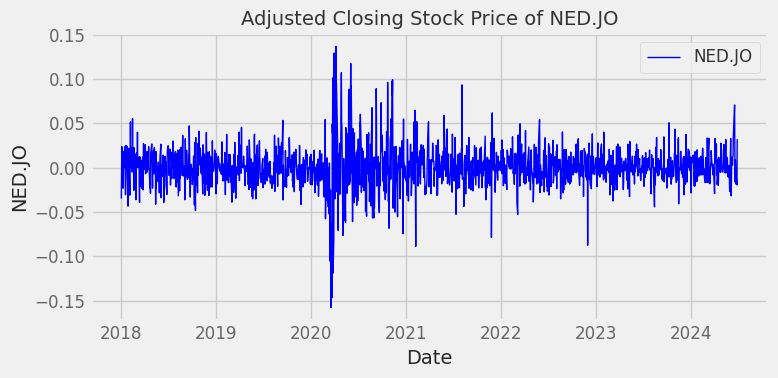

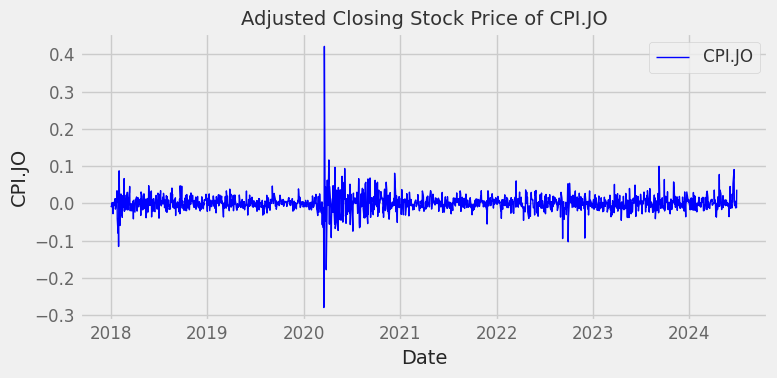

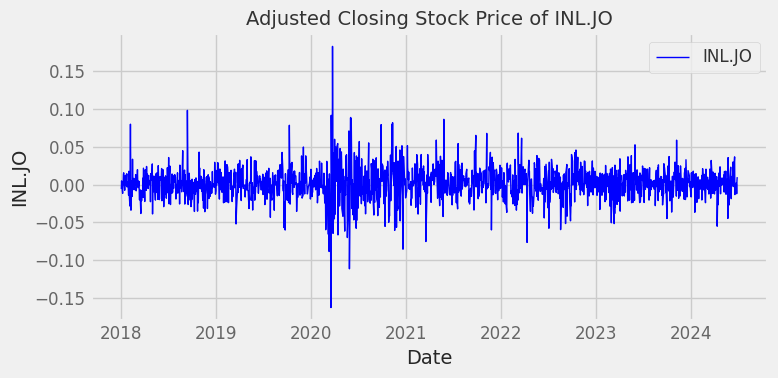

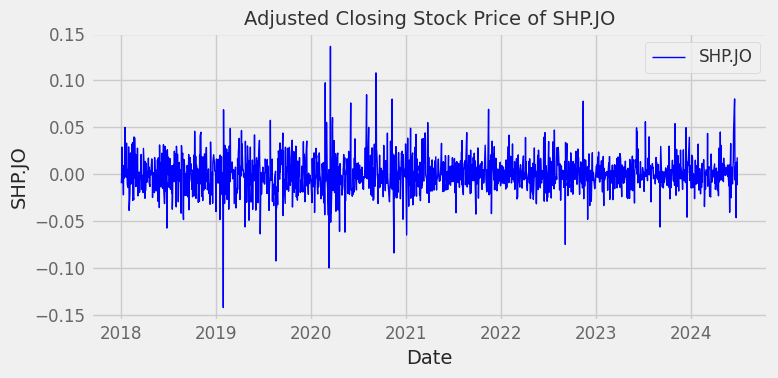

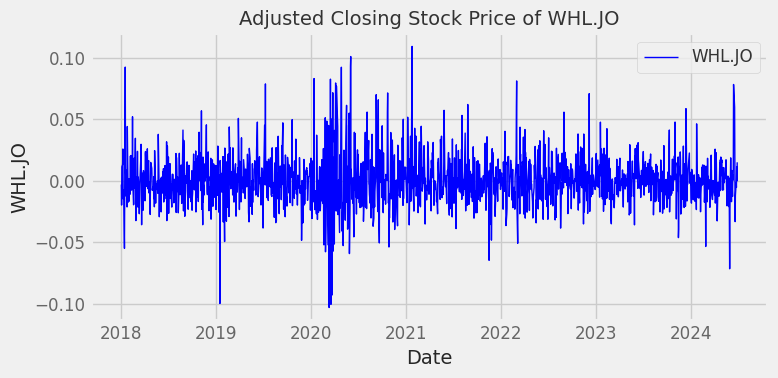

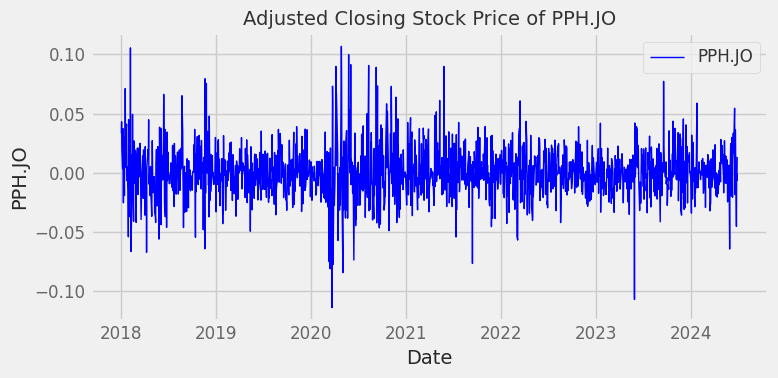

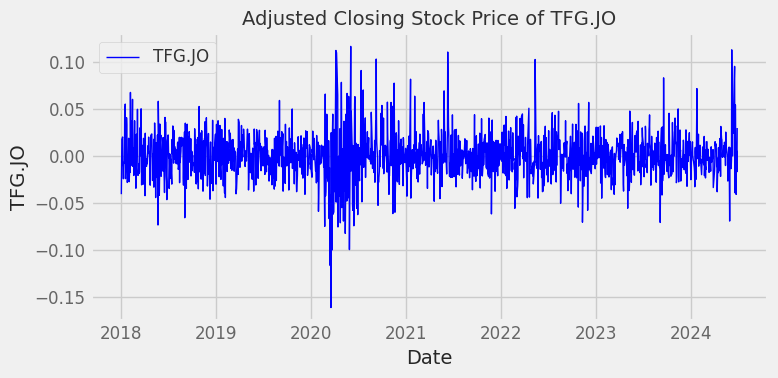

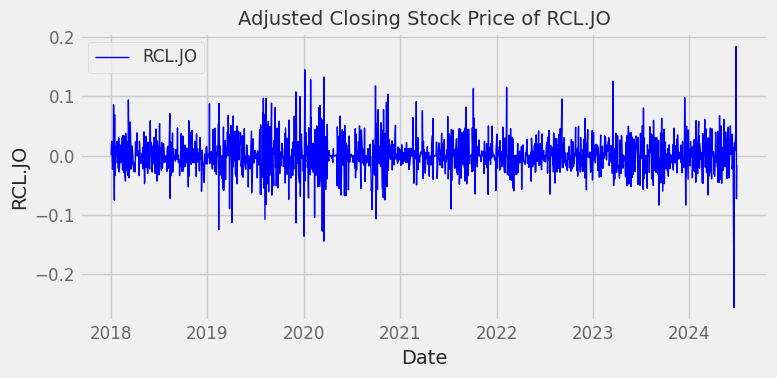

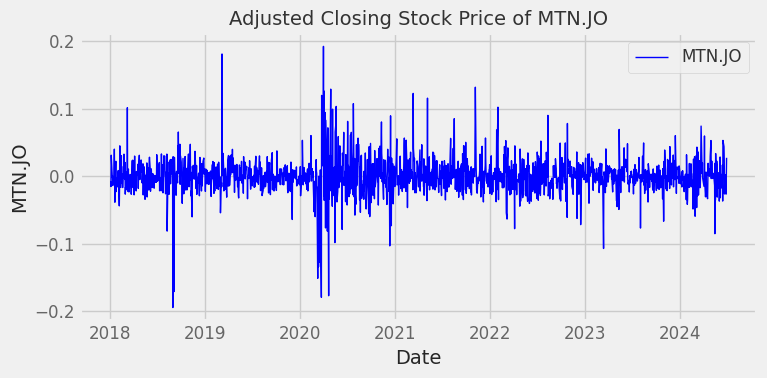

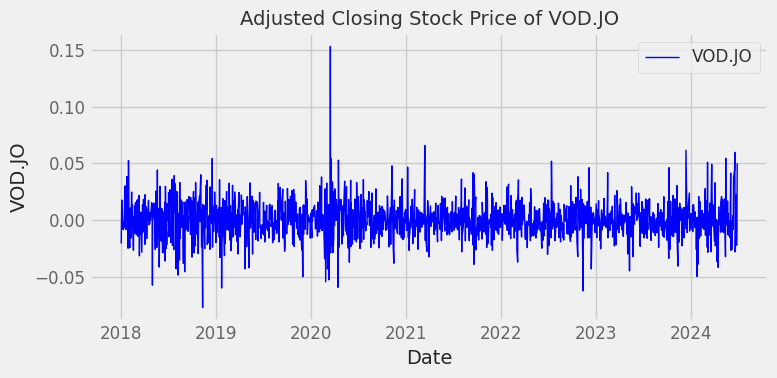

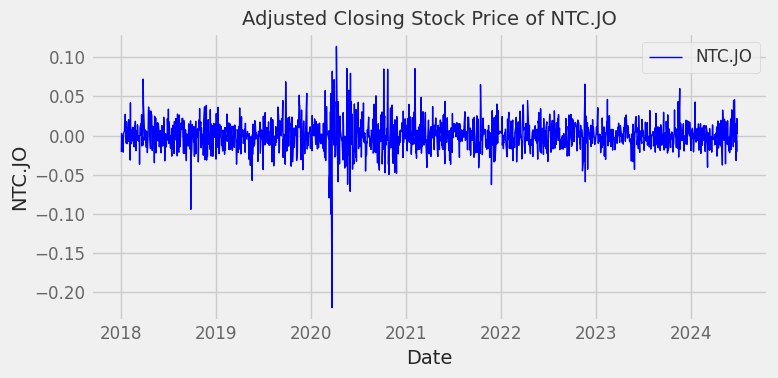

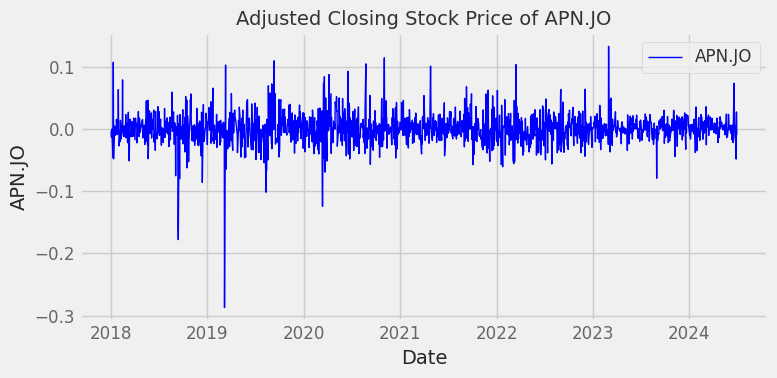

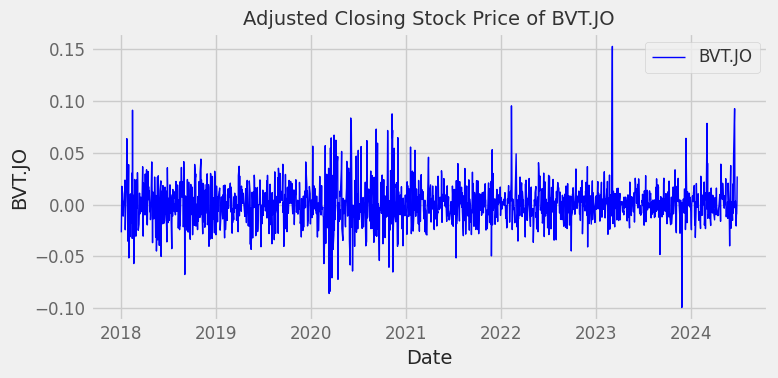

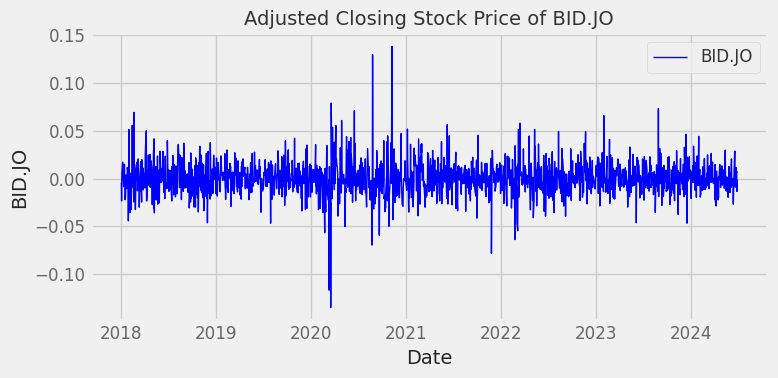

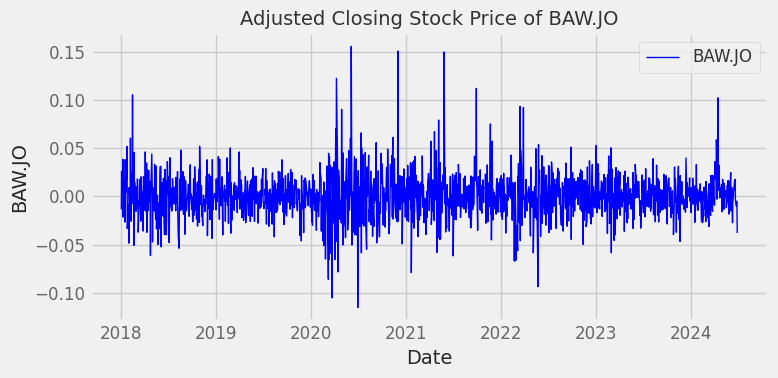

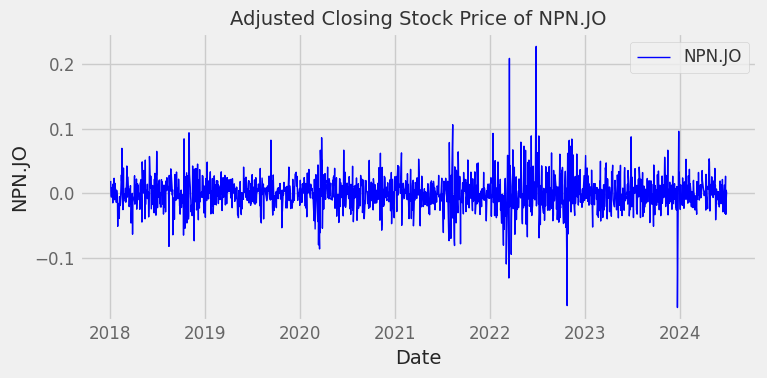

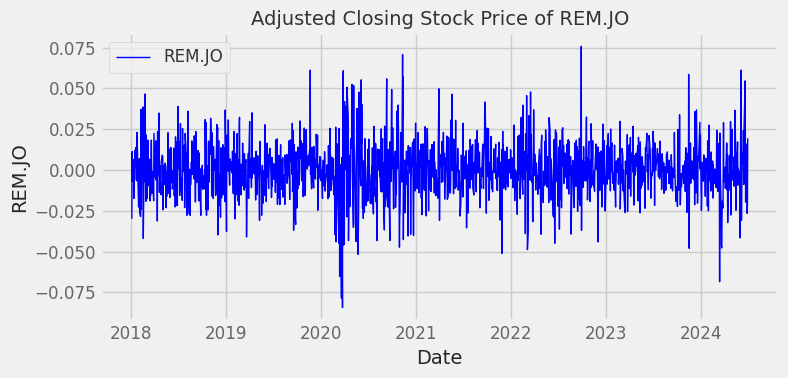

In [ ]:
import matplotlib.pyplot as plt

# Create time series plots for each ticker in the dataset
def Time_series(df2):
    columns = df2.columns
    for column in columns:
        plt.figure(figsize=(8, 4))
        plt.plot(df.index, df[column], label=column, color='blue', linewidth =1)
        plt.title(f'Adjusted Closing Stock Price of {column}', fontsize=14)
        plt.xlabel('Date', fontsize = 14)
        plt.ylabel(column, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'{column} Time Series Plot.png')
        # plt.savefig(f'C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_{column} Time Series Plot.pdf')
        plt.show()

# Call the function to plot the time series for all columns
Time_series(df2)


Time Series on One Sheet

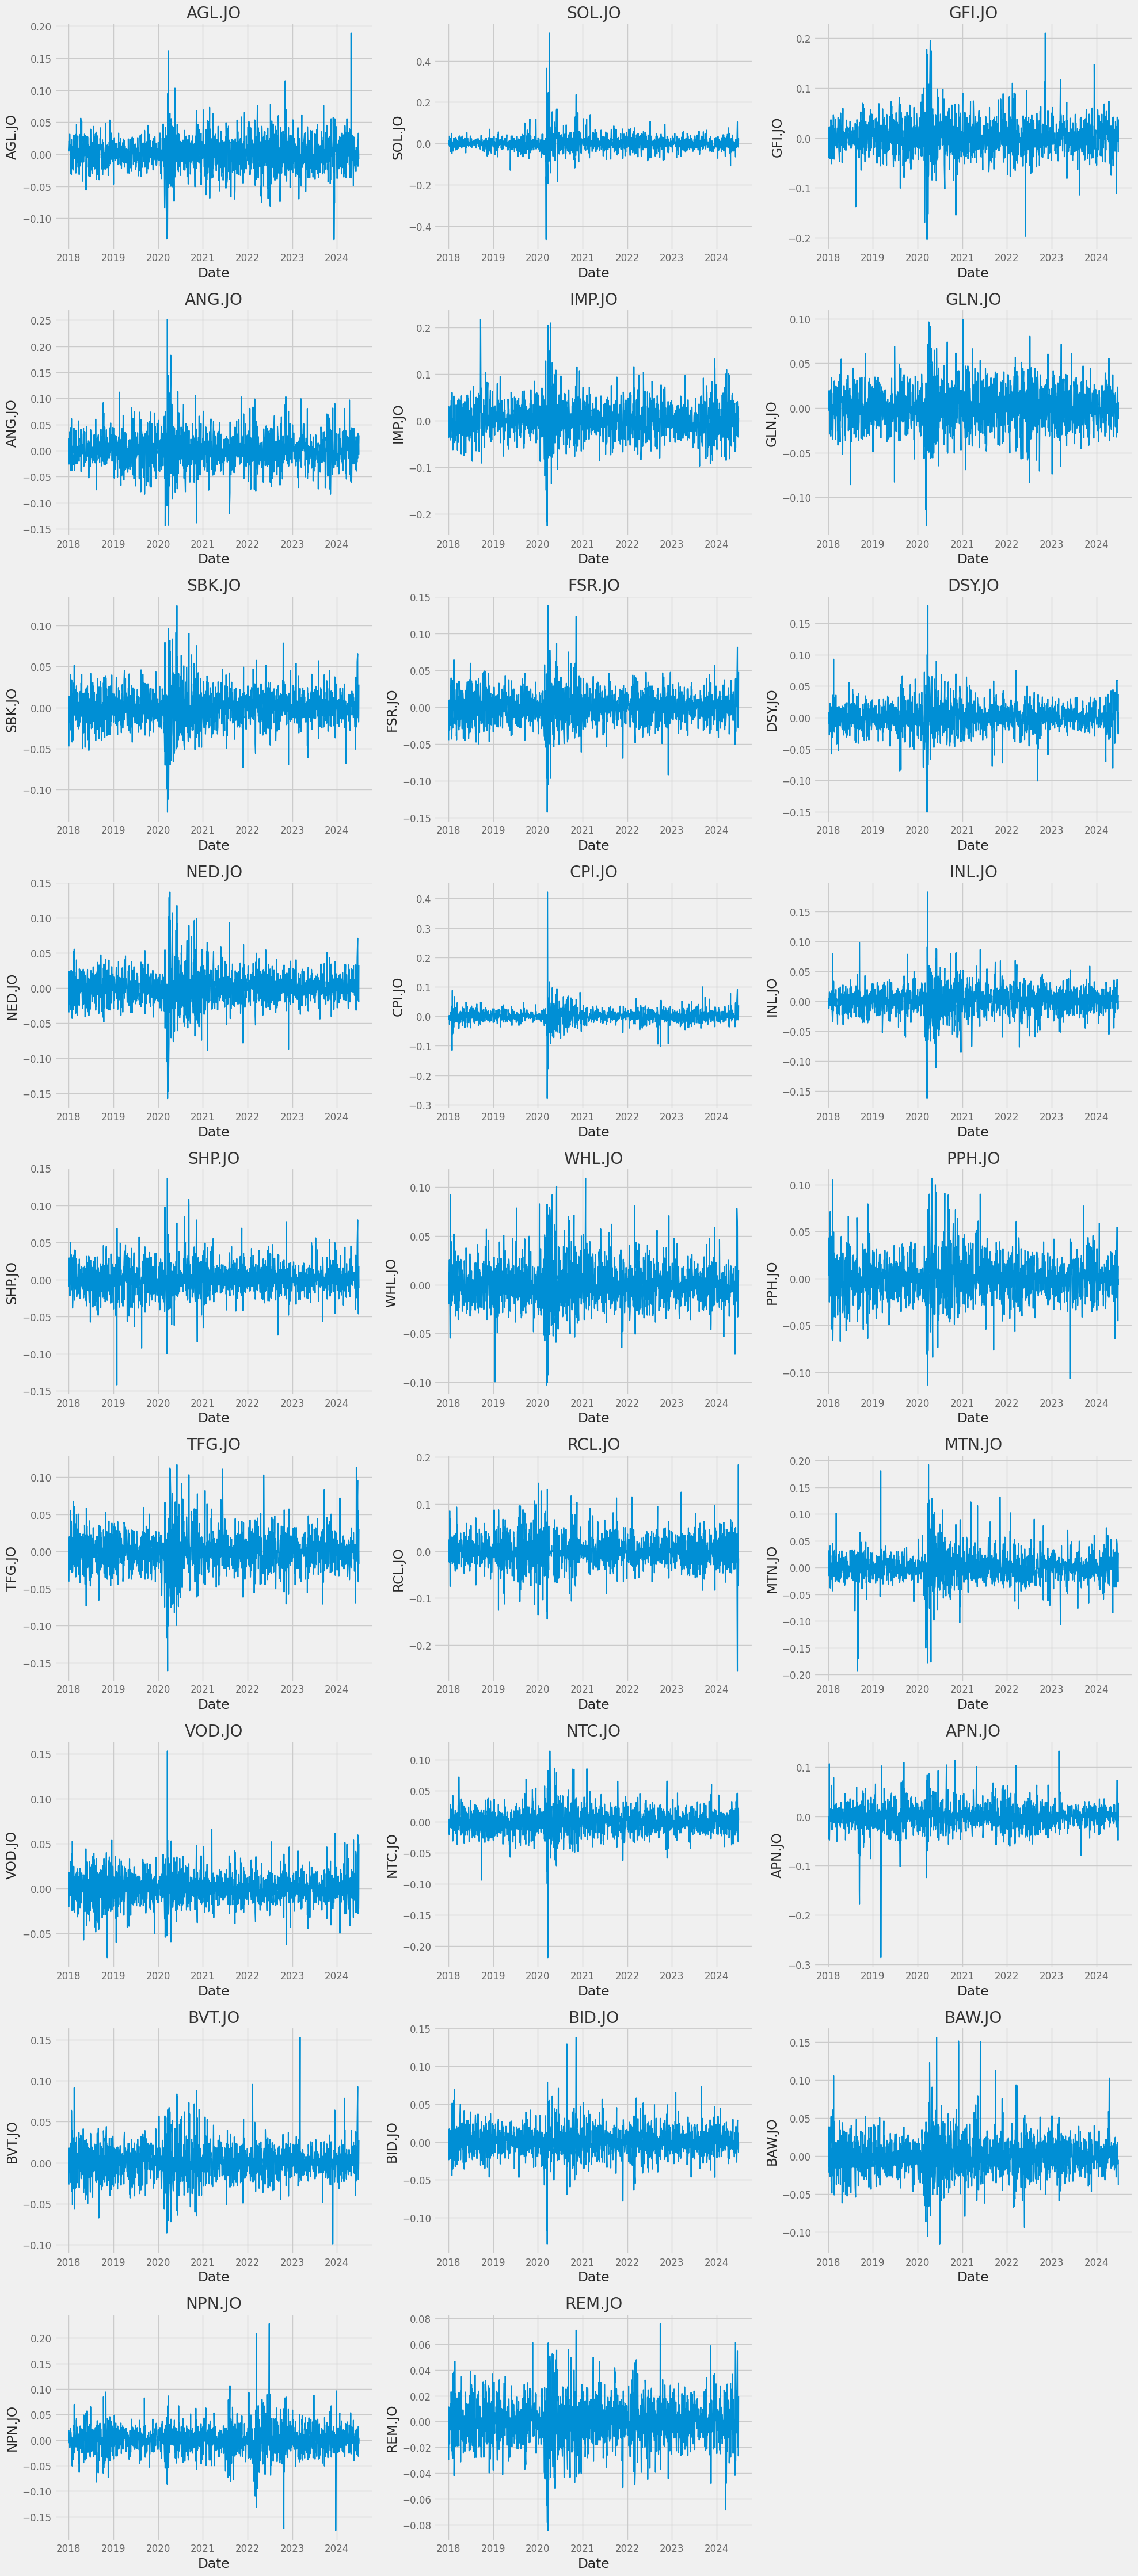

In [ ]:
import matplotlib.pyplot as plt

def Time_series(df2):
    """
    Plots time series for each column in the DataFrame with adjustable line thickness.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    line_thickness (float): The thickness of the lines in the plots.

    """
    columns = df2.columns  # Get all column names
    num_columns = len(columns)  # Count how many columns there are

    # Set up the number of rows and columns for subplots (4 columns per row)
    n_rows = (num_columns + 3) // 3  # Create enough rows to hold all plots

    # Create subplots
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 5))
    axes = axes.flatten()  # Flatten to iterate through each subplot easily

    # Loop through each column and create a line plot
    for i, column in enumerate(columns):
        axes[i].plot(df.index, df[column], linewidth=1.5)
        axes[i].set_title(column)
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)

    # Hide any unused subplots (if the number of columns is not a multiple of 4)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig('Time Series Plots.png')
    # plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Time Series Plots.pdf')

    # Show the plot
    plt.show()

# Example usage
Time_series(df2)


This is the end of Efficient Frontier Portfolios

#Quadratic Mean Variance Portfolio with 11% rate of returns and maximum cap of 0.15

Get returns

In [ ]:
returns = df2
returns.head()

AGL.JO    SOL.JO    GFI.JO    ANG.JO    IMP.JO    GLN.JO  \
Date                                                                     
2018-01-03  0.432893  0.456188  0.873547  2.326308  3.067490  0.107113   
2018-01-04  0.635203 -0.317658 -3.950944 -2.600367 -3.630973 -0.244577   
2018-01-05  0.867895  1.458746  1.972198  1.803278  2.686863 -0.091949   
2018-01-08  2.059805  0.970163 -1.178885  1.157888  2.736848  1.779149   
2018-01-09  1.824824 -0.988482 -3.075462 -2.342325 -2.254110 -0.015081   

              SBK.JO    FSR.JO    DSY.JO    NED.JO  ...    RCL.JO    MTN.JO  \
Date                                                ...                       
2018-01-03 -4.740572 -4.496088 -1.041094 -3.492667  ...  0.065812 -0.770204   
2018-01-04  1.361630 -0.221157  0.775208  0.127005  ...  1.906619 -1.529778   
2018-01-05  0.111975  0.870793 -0.164841  2.370005  ...  2.387083  3.099416   
2018-01-08  1.033013 -0.894678 -0.930128 -1.084022  ... -2.331430  0.764563   
2018-01-09  1.233264  0.395937  0.094460  1.859086  ... -1.096763 -0.110519   

              VOD.JO    NTC.JO    APN.JO    BVT.JO    BID.JO    BAW.JO  \
Date                                                                     
2018-01-03 -2.062926 -2.089195 -0.285425 -2.675617 -0.435512 -1.353207   
2018-01-04  0.354614  0.287235 -1.284405 -0.739266 -2.338487  2.621780   
2018-01-05  1.766794 -0.613763 -0.003724  1.771823  0.516784  0.218647   
2018-01-08  0.590268 -0.164667 -2.568865  1.047442  1.713808  0.816482   
2018-01-09 -0.586804  0.000000 -4.559667 -0.203543  0.374051  3.864006   

              NPN.JO    REM.JO  
Date                            
2018-01-03  1.929671 -2.997745  
2018-01-04 -0.364100  1.124570  
2018-01-05 -0.557382 -0.698278  
2018-01-08 -0.536714  0.638059  
2018-01-09  0.944398 -0.129365  

[5 rows x 26 columns]

Calculate the mean returns

In [ ]:
#Calculate the mean
mean_returns = df2.mean()
mean_returns
# Check the number of Assets
num_assets = len(mean_returns)
num_assets

26

Create an annualised covariance matrix

In [ ]:
#Now to create and show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual.head() #Just visuaising the first 5 rows

AGL.JO       SOL.JO       GFI.JO       ANG.JO       IMP.JO  \
AGL.JO  1493.666804  1050.688799   489.003892   460.588729  1085.022123   
SOL.JO  1050.688799  4169.281608   128.275785   170.536157  1312.155105   
GFI.JO   489.003892   128.275785  2858.137628  2191.463108  1219.278450   
ANG.JO   460.588729   170.536157  2191.463108  2424.249082  1165.749348   
IMP.JO  1085.022123  1312.155105  1219.278450  1165.749348  3457.946472   

             GLN.JO      SBK.JO      FSR.JO      DSY.JO      NED.JO  ...  \
AGL.JO   987.468303  379.405756  388.377065  385.236450  377.874337  ...   
SOL.JO  1063.219526  773.411663  678.373717  745.676636  990.162468  ...   
GFI.JO   320.359617   -8.990364   11.331332  108.849590  -14.519671  ...   
ANG.JO   254.828987  -16.437259    8.874532  110.475612  -25.059602  ...   
IMP.JO   829.706042  453.924575  412.344980  484.645768  519.353998  ...   

            RCL.JO       MTN.JO      VOD.JO      NTC.JO      APN.JO  \
AGL.JO   47.632896   454.736062  177.876875  195.869225  213.756476   
SOL.JO  157.639336  1005.125766  262.308881  399.527532  340.856945   
GFI.JO  -44.529030   102.445773   92.326952   26.997426   89.356514   
ANG.JO   17.042905   102.180393  110.894343   37.715466   79.928973   
IMP.JO  169.965791   616.621760  197.076805  310.710189  254.414655   

            BVT.JO      BID.JO      BAW.JO      NPN.JO      REM.JO  
AGL.JO  267.150583  308.438364  403.080930  387.575707  298.204231  
SOL.JO  531.280448  629.286824  670.811935  300.896744  595.298093  
GFI.JO   72.318678  151.574553   51.436043  143.640663   71.231808  
ANG.JO   57.883218  131.195070   48.871521  123.306219   67.516561  
IMP.JO  369.544741  395.991160  460.798942  468.392832  373.952347  

[5 rows x 26 columns]

Print the annualised covarince magrix and convert it o Latex

In [ ]:
print(cov_matrix_annual.to_latex(index=True, float_format="{:.4f}".format))

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & AGL.JO & SOL.JO & GFI.JO & ANG.JO & IMP.JO & GLN.JO & SBK.JO & FSR.JO & DSY.JO & NED.JO & CPI.JO & INL.JO & SHP.JO & WHL.JO & PPH.JO & TFG.JO & RCL.JO & MTN.JO & VOD.JO & NTC.JO & APN.JO & BVT.JO & BID.JO & BAW.JO & NPN.JO & REM.JO \\
\midrule
AGL.JO & 1493.6668 & 1050.6888 & 489.0039 & 460.5887 & 1085.0221 & 987.4683 & 379.4058 & 388.3771 & 385.2365 & 377.8743 & 365.3634 & 560.0262 & 170.2588 & 283.7848 & 233.2437 & 370.7364 & 47.6329 & 454.7361 & 177.8769 & 195.8692 & 213.7565 & 267.1506 & 308.4384 & 403.0809 & 387.5757 & 298.2042 \\
SOL.JO & 1050.6888 & 4169.2816 & 128.2758 & 170.5362 & 1312.1551 & 1063.2195 & 773.4117 & 678.3737 & 745.6766 & 990.1625 & 509.7439 & 862.2311 & 302.5217 & 531.0216 & 525.0281 & 698.1879 & 157.6393 & 1005.1258 & 262.3089 & 399.5275 & 340.8569 & 531.2804 & 629.2868 & 670.8119 & 300.8967 & 595.2981 \\
GFI.JO & 489.0039 & 128.2758 & 2858.1376 & 2191.4631 & 1219.2784 & 320.3596 & -8.9904 & 11.3313 & 10

Portfolio Construction

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import time

start_time = time.time()

# Function to optimize the portfolio using Minimum Variance Optimization
def optimize_portfolio_mvp(mean_returns, cov_matrix, target_return, tickers, max_weight=0.15):
    """
    Optimize portfolio using Minimum Variance Portfolio (MVP) with a diversification constraint.

    Parameters:
    mean_returns (array-like): Expected returns for each stock.
    cov_matrix (array-like): Covariance matrix of returns.
    target_return (float): Target return for the portfolio.
    tickers (list): List of stock tickers.
    max_weight (float): Maximum allowed weight for any single asset.

    Returns:
    dict: Dictionary containing optimal weights, expected return, volatility, and Sharpe ratio.
    """
    # Calculate the number of assets
    num_assets = len(mean_returns)

    # Define variables (weights for each stock)
    weights = cp.Variable(num_assets)

    # Define the objective function (portfolio variance)
    portfolio_variance = cp.quad_form(weights, cov_matrix)

    # Constraints
    constraints = [
        cp.sum(weights) == 1,          # Weights must sum to 1 (fully invested)
        weights >= 0,                  # No short selling (weights >= 0)
        cp.matmul(mean_returns, weights) >= target_return,  # Target return constraint
        weights <= max_weight          # Maximum weight constraint for diversification
    ]

    # Define the optimization problem (Minimize portfolio variance)
    problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)

    # Solve the problem
    problem.solve()

    # Get the optimal weights
    optimal_weights = weights.value

    # Ensure no negative weights (post-processing in case of numerical instability)
    optimal_weights = np.maximum(optimal_weights, 0)

    # Calculate the portfolio performance with the optimal weights
    portfolio_return = np.dot(optimal_weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
    risk_free_rate = 0.01  # Risk-free rate
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Create a dictionary of tickers and their optimal weights
    optimal_weights_dict = dict(zip(tickers, optimal_weights))

    # Return the results
    return {
        'optimal_weights': optimal_weights_dict,
        'portfolio_return': portfolio_return,
        'portfolio_volatility': portfolio_volatility,
        'sharpe_ratio': sharpe_ratio
    }

# Implementation usage:

# Assuming you have a DataFrame df with stock tickers as columns
tickers = df2.columns.tolist()  # Extract stock tickers

mean_returns = np.array(df2.mean())  # Expected returns for assets
cov_matrix = np.array(cov_matrix_annual)  # Covariance matrix for the assets
target_return = 0.11  # Set a target return

# Optimize the portfolio using Minimum Variance Portfolio optimization
result = optimize_portfolio_mvp(mean_returns, cov_matrix, target_return, tickers)

# Display the results
print("Optimal Weights:", result['optimal_weights'])
print("Expected Portfolio Return:", result['portfolio_return'])
print("Portfolio Volatility:", result['portfolio_volatility'])
print("Sharpe Ratio:", result['sharpe_ratio'])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"MVP-constrained Quadratic Programming(Capped 0.15) took {elapsed_time / 60:.2f} minutes")


Optimal Weights: {'AGL.JO': 0.10697712674758944, 'SOL.JO': 0.0, 'GFI.JO': 0.15, 'ANG.JO': 0.14999999999999997, 'IMP.JO': 0.10859419443510168, 'GLN.JO': 0.0, 'SBK.JO': 0.0, 'FSR.JO': 0.0, 'DSY.JO': 0.0, 'NED.JO': 0.0, 'CPI.JO': 0.14999999999999997, 'INL.JO': 0.15, 'SHP.JO': 0.0645248746755943, 'WHL.JO': 0.0, 'PPH.JO': 0.0, 'TFG.JO': 0.0, 'RCL.JO': 0.03434239217691883, 'MTN.JO': 0.0, 'VOD.JO': 0.0, 'NTC.JO': 0.0, 'APN.JO': 0.0, 'BVT.JO': 0.0, 'BID.JO': 0.0, 'BAW.JO': 0.0, 'NPN.JO': 0.08556141196479586, 'REM.JO': 0.0}
Expected Portfolio Return: 0.11
Portfolio Volatility: 25.717643177753985
Sharpe Ratio: 0.003888381190641178
MVP-constrained Quadratic Programming(Capped 0.15) took 0.00 minutes


Extracting the Portfolio weights and converting them to Latex

In [ ]:
dp = pd.DataFrame.from_dict(result['optimal_weights'], orient='index', columns=['Weight']).round(5)
dp = dp.sort_values(by='Weight', ascending=False).to_latex()
print(dp)


\begin{tabular}{lr}
\toprule
 & Weight \\
\midrule
GFI.JO & 0.150000 \\
ANG.JO & 0.150000 \\
CPI.JO & 0.150000 \\
INL.JO & 0.150000 \\
IMP.JO & 0.108590 \\
AGL.JO & 0.106980 \\
NPN.JO & 0.085560 \\
SHP.JO & 0.064520 \\
RCL.JO & 0.034340 \\
BAW.JO & 0.000000 \\
BID.JO & 0.000000 \\
BVT.JO & 0.000000 \\
APN.JO & 0.000000 \\
NTC.JO & 0.000000 \\
VOD.JO & 0.000000 \\
MTN.JO & 0.000000 \\
WHL.JO & 0.000000 \\
TFG.JO & 0.000000 \\
PPH.JO & 0.000000 \\
SOL.JO & 0.000000 \\
NED.JO & 0.000000 \\
DSY.JO & 0.000000 \\
FSR.JO & 0.000000 \\
SBK.JO & 0.000000 \\
GLN.JO & 0.000000 \\
REM.JO & 0.000000 \\
\bottomrule
\end{tabular}



Visualise the weights distribution

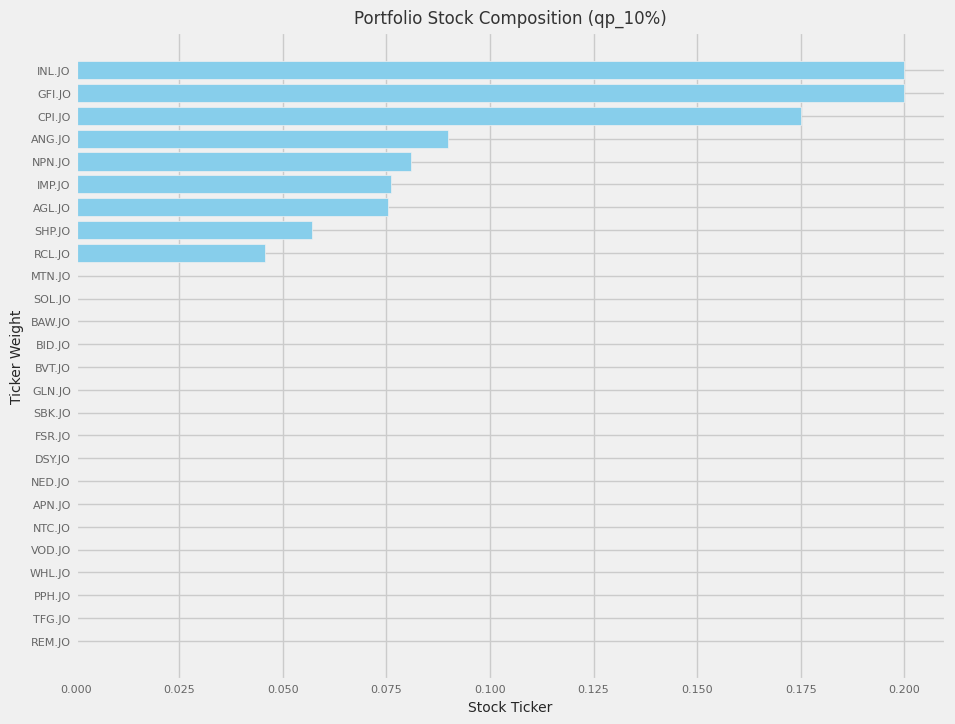

In [ ]:
data3 = {
    'Ticker': ['AGL.JO', 'SOL.JO', 'GFI.JO', 'ANG.JO', 'IMP.JO',  'GLN.JO', 'SBK.JO', 'FSR.JO', 'DSY.JO',
               'NED.JO', 'CPI.JO', 'INL.JO', 'SHP.JO', 'WHL.JO', 'PPH.JO', 'TFG.JO', 'RCL.JO', 'MTN.JO',
               'VOD.JO', 'NTC.JO', 'APN.JO', 'BVT.JO', 'BID.JO', 'BAW.JO', 'NPN.JO', 'REM.JO'
               ],
    'Weight': [0.07530777352342968, 0.0, 0.19999999999999998, 0.08978952617248671, 0.07622687101703339,  0.0, 0.0,
               0.0, 0.0, 0.0, 0.1750553837771377, 0.2, 0.05702710052432938,  0.0, 0.0, 0.0, 0.045657333208077376, 0.0,
               0.0,  0.0, 0.0,  0.0,   0.0, 0.0, 0.08093601177750587,  0.0
               ]
}
# dp_1 = pd.DataFrame.from_dict(result['optimal_weights_1'], orient='index', columns=['Weight']).round(5)
# dp_1 = dp_1.sort_values(by='Weight', ascending=False)
df6 = pd.DataFrame(data3).sort_values(by='Weight', ascending=True)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df6['Ticker'], df6['Weight'], color='skyblue')
plt.xlabel('Stock Ticker', fontsize=10)
plt.ylabel('Ticker Weight', fontsize=10)
plt.title('Portfolio Stock Composition (qp_10%)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Portfolio Composition (10% returns).png')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Portfolio Composition by Stock Weight.pdf')
plt.show()

#Quadratic Mean Variance Portfolio with 11% rate of returns

In [ ]:
import cvxpy as cp
start_time = time.time()

# Function to optimize the portfolio using Quadratic Programming
def optimize_portfolio_qp(mean_returns, cov_matrix, target_return, tickers):
    """
    Optimize portfolio using Quadratic Programming.

    Parameters:
    mean_returns (array-like): Expected returns for each stock.
    cov_matrix (array-like): Covariance matrix of returns.
    target_return (float): Target return for the portfolio.
    tickers (list): List of stock tickers.

    Returns:
    dict: Dictionary containing optimal weights, expected return, volatility, and Sharpe ratio.
    """
    # Calculate the mean_returns
    mean_returns = df2.mean()

    # Calculate the number of assets
    num_assets = len(mean_returns)

    # Define variables (weights for each stock)
    weights = cp.Variable(num_assets)

    # Define the objective function (portfolio variance)
    portfolio_variance = cp.quad_form(weights, cov_matrix)

    # Constraints
    constraints = [
        cp.sum(weights) == 1,         # Weights must sum to 1 (fully invested)
        weights >= 0,                 # No short selling (weights >= 0)
        cp.matmul(mean_returns, weights) >= target_return  # Target return constraint
    ]

    # Define the optimization problem
    problem = cp.Problem(cp.Minimize(portfolio_variance), constraints)

    # Solve the problem
    problem.solve()

    # Get the optimal weights
    optimal_weights = weights.value

    # Ensure no negative weights (post-processing in case of numerical instability)
    optimal_weights = np.maximum(optimal_weights, 0)

    # Calculate the portfolio performance with the optimal weights
    portfolio_return = np.dot(optimal_weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
    risk_free_rate = 0.01  # Risk-free rate
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Create a dictionary of tickers and their optimal weights
    optimal_weights_dict = dict(zip(tickers, optimal_weights))

    # Return the results
    return {
        'optimal_weights': optimal_weights_dict,
        'portfolio_return': portfolio_return,
        'portfolio_volatility': portfolio_volatility,
        'sharpe_ratio': sharpe_ratio
}

# Implementation usage:

# Assuming you have a DataFrame df with stock tickers as columns
tickers = df2.columns.tolist()  # Extract stock tickers

mean_returns = np.array(df2.mean())  # Expected returns for assets
cov_matrix = np.array(cov_matrix_annual)  # Covariance matrix for the assets
target_return = 0.11  # Set a target return

# Optimize the portfolio using Quadratic Programming
result = optimize_portfolio_qp(mean_returns, cov_matrix, target_return, tickers)

# Display the results
print("Optimal Weights:", result['optimal_weights'])
print("Expected Portfolio Return:", result['portfolio_return'])
print("Portfolio Volatility:", result['portfolio_volatility'])
print("Sharpe Ratio:", result['sharpe_ratio'])

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Quadratic Programming Optimization took {elapsed_time / 60:.2f} minutes")


Optimal Weights: {'AGL.JO': 0.032762749020296016, 'SOL.JO': 0.0, 'GFI.JO': 0.2572572351133221, 'ANG.JO': 0.017857073903344324, 'IMP.JO': 0.042436684245848455, 'GLN.JO': 0.0, 'SBK.JO': 0.0, 'FSR.JO': 5.929708913142965e-23, 'DSY.JO': 0.0, 'NED.JO': 0.0, 'CPI.JO': 0.10761981293634296, 'INL.JO': 0.3311664611007786, 'SHP.JO': 0.06506155110762549, 'WHL.JO': 0.0, 'PPH.JO': 0.0, 'TFG.JO': 2.4641117385342493e-23, 'RCL.JO': 0.063117462079817, 'MTN.JO': 0.0, 'VOD.JO': 0.0, 'NTC.JO': 0.0, 'APN.JO': 0.0, 'BVT.JO': 0.0, 'BID.JO': 0.0, 'BAW.JO': 0.0, 'NPN.JO': 0.08272097049262503, 'REM.JO': 0.0}
Expected Portfolio Return: 0.10999999999999999
Portfolio Volatility: 24.437065046870963
Sharpe Ratio: 0.0040921444456687925
Quadratic Programming Optimization took 0.00 minutes


Extracting the weights

In [ ]:
dp_1 = pd.DataFrame.from_dict(result['optimal_weights'], orient='index', columns=['Weight']).round(5)
dp_1 = dp_1.sort_values(by='Weight', ascending=False).to_latex()
print(dp_1)

\begin{tabular}{lr}
\toprule
 & Weight \\
\midrule
INL.JO & 0.331170 \\
GFI.JO & 0.257260 \\
CPI.JO & 0.107620 \\
NPN.JO & 0.082720 \\
SHP.JO & 0.065060 \\
RCL.JO & 0.063120 \\
IMP.JO & 0.042440 \\
AGL.JO & 0.032760 \\
ANG.JO & 0.017860 \\
BAW.JO & 0.000000 \\
BID.JO & 0.000000 \\
BVT.JO & 0.000000 \\
APN.JO & 0.000000 \\
NTC.JO & 0.000000 \\
VOD.JO & 0.000000 \\
MTN.JO & 0.000000 \\
WHL.JO & 0.000000 \\
TFG.JO & 0.000000 \\
PPH.JO & 0.000000 \\
SOL.JO & 0.000000 \\
NED.JO & 0.000000 \\
DSY.JO & 0.000000 \\
FSR.JO & 0.000000 \\
SBK.JO & 0.000000 \\
GLN.JO & 0.000000 \\
REM.JO & 0.000000 \\
\bottomrule
\end{tabular}



Visualise the portfolio weights

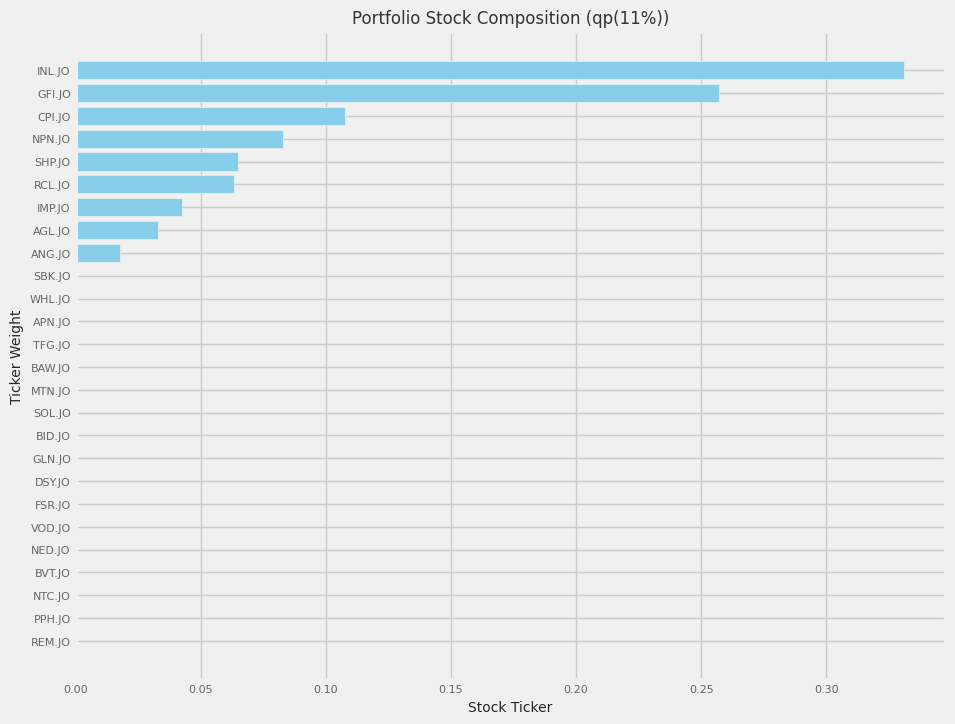

In [ ]:
data = {
    'Ticker': ['AGL.JO', 'SOL.JO','GFI.JO', 'ANG.JO', 'IMP.JO', 'GLN.JO', 'SBK.JO',
               'FSR.JO', 'DSY.JO', 'NED.JO', 'CPI.JO', 'INL.JO', 'SHP.JO', 'WHL.JO',
               'PPH.JO', 'TFG.JO', 'RCL.JO', 'MTN.JO', 'VOD.JO', 'NTC.JO', 'APN.JO',
               'BVT.JO', 'BID.JO', 'BAW.JO', 'NPN.JO', 'REM.JO'
    ],
    'Weight':[0.03276295494323749,0.0, 0.25725733487354985, 0.01785701689891527,
              0.042436745200533456,  0.0,  5.608199706342226e-23,  0.0, 0.0, 0.0, 0.10761985611968154,
              0.3311662368086813, 0.06506163153505277, 5.405292885973317e-23, 0.0, 2.4208470490625025e-23,  0.06311730733634838,
              0.0, 0.0, 0.0, 2.5554583874926037e-23,0.0, 0.0, 6.434645151592963e-24,  0.0827209162839997,  0.0
              ]
}
df4 = pd.DataFrame(data).sort_values(by='Weight', ascending=True)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df4['Ticker'], df4['Weight'], color='skyblue')
plt.xlabel('Stock Ticker', fontsize=10)
plt.ylabel('Ticker Weight', fontsize=10)
plt.title('Portfolio Stock Composition (qp(11%))', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Portfolio Composition (11% returns).png')
# plt.savefig('C:\\Users\\asadullaah.DESKTOP-IVTI4RO\\Desktop\\ML Project\\Results_Pictures_Portfolio Composition by Stock Weight.pdf')
plt.show()

Comparing the weights in the two portfolios

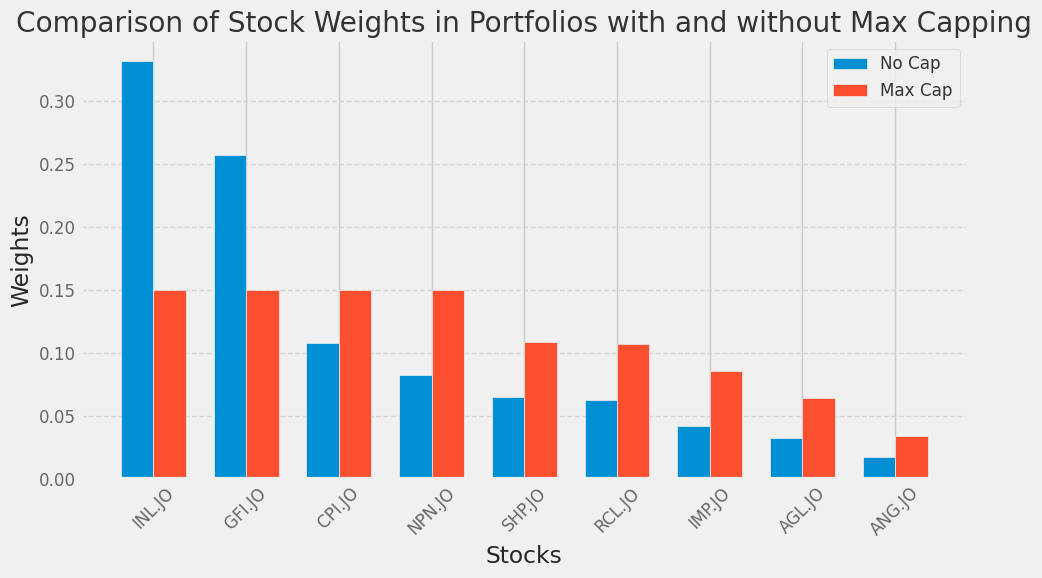

In [ ]:
stocks_max_cap = ['INL.JO', 'GFI.JO', 'CPI.JO', 'NPN.JO', 'SHP.JO', 'RCL.JO', 'IMP.JO', 'AGL.JO', 'ANG.JO']
weights_max_cap = [0.33117, 0.25726, 0.10762, 0.08272, 0.06506, 0.06312, 0.04244, 0.03276, 0.01786]

stocks_no_cap = ['GFI.JO', 'ANG.JO', 'CPI.JO', 'INL.JO', 'IMP.JO', 'AGL.JO', 'NPN.JO', 'SHP.JO', 'RCL.JO']
weights_no_cap = [0.15, 0.15, 0.15, 0.15, 0.10859, 0.10698, 0.08556, 0.06452, 0.03434]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width for the plot
bar_width = 0.35

# Positions of the bars on the x-axis
x = np.arange(len(stocks_max_cap))

# Bar plot for each portfolio
bars1 = ax.bar(x - bar_width/2, weights_max_cap, bar_width, label='No Cap')
bars2 = ax.bar(x + bar_width/2, weights_no_cap, bar_width, label='Max Cap')

# Labels and Title
ax.set_xlabel('Stocks')
ax.set_ylabel('Weights')
ax.set_title('Comparison of Stock Weights in Portfolios with and without Max Capping')
ax.set_xticks(x)
ax.set_xticklabels(stocks_max_cap, rotation=45)
ax.legend()

# Show grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig('Comparison of Stock Weights in Portfolios with and without Max Capping.png', bbox_inches='tight')
plt.show()


Comparing the volatility of max-cap and no-cap portfolios

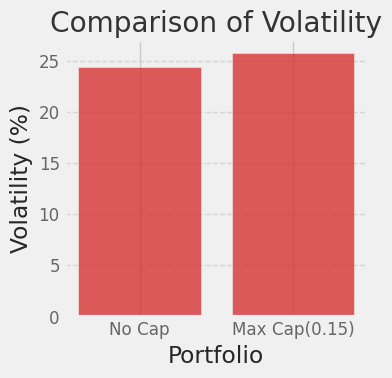

In [ ]:
# Define the labels again for clarity
labels = ['No Cap', 'Max Cap(0.15)']
volatility = [24.43706402, 25.71764094]
sharpe_ratio = [0.4092145, 0.3888382]

# Create figure for Volatility comparison
fig, ax = plt.subplots(figsize=(4, 4))

# Bar width for the plot
bar_width = 0.1

# Positions of the bars on the x-axis
x = np.arange(len(labels))

# Plot Volatility
ax.bar(labels, volatility, color='tab:red', alpha=0.75)
ax.set_xlabel('Portfolio')
ax.set_ylabel('Volatility (%)')
ax.set_title('Comparison of Volatility')

# Show grid
ax.grid(axis='y', linestyle='--', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.savefig('Comparison of Volatility.png', bbox_inches='tight')
plt.show()


Comparing the Sharpe ratios of max-cap and no-max cap portfolios

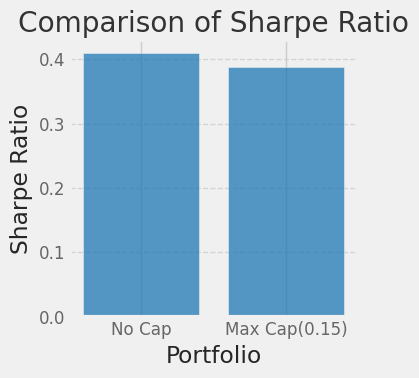

In [ ]:
# Create figure for Sharpe Ratio comparison
fig, ax = plt.subplots(figsize=(4, 4))
bar_width = 0.1
# Plot Sharpe Ratio
ax.bar(labels, sharpe_ratio, color='tab:blue', alpha=0.75)
ax.set_xlabel('Portfolio')
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Comparison of Sharpe Ratio')

# Show grid
ax.grid(axis='y', linestyle='--', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.savefig('Comparison of Sharpe Ratio.png', bbox_inches='tight')
plt.show()


#Handling the Bechmark Portfolio

Fetching Benchmark Times Series Data

In [ ]:
Benchmark = yf.download('^J200.JO', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Checking the info in the Benchmark Dataframe

In [ ]:
Benchmark.info() #checking infor about the benchmark portfolio

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1609 entries, 2018-01-02 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1609 non-null   float64
 1   High       1609 non-null   float64
 2   Low        1609 non-null   float64
 3   Close      1609 non-null   float64
 4   Adj Close  1609 non-null   float64
 5   Volume     1609 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 88.0 KB


In [ ]:
df1=Benchmark.drop(columns='Volume') #droping the volume column
# df1.pct_change().dropna()
df1.head()


Open          High           Low         Close  \
Date                                                                 
2018-01-02  52533.039062  52891.199219  52383.941406  52823.988281   
2018-01-03  52823.988281  53305.179688  52219.351562  52832.070312   
2018-01-04  52832.070312  53040.621094  52190.859375  52662.628906   
2018-01-05  52662.628906  52979.500000  52403.160156  52842.679688   
2018-01-08  52842.679688  53189.308594  52763.671875  53131.699219   

               Adj Close  
Date                      
2018-01-02  52823.988281  
2018-01-03  52832.070312  
2018-01-04  52662.628906  
2018-01-05  52842.679688  
2018-01-08  53131.699219

Calculating the Benchmark Daily Returns

In [ ]:
# Calculate daily returns
df1['Daily_Return'] = df1['Adj Close'].pct_change()*100

# Drop the first row with NaN return
df1.dropna(subset=['Daily_Return'], inplace=True)
df1['Daily_Return'].head()

Date
2018-01-03    0.015300
2018-01-04   -0.320717
2018-01-05    0.341895
2018-01-08    0.546943
2018-01-09    0.099113
Name: Daily_Return, dtype: float64

In [ ]:
returns = df1['Daily_Return'] # the returns for the Benchmark portfolio
returns.isnull().sum()

0

In [ ]:
df1['Daily_Return'].max(), df1['Daily_Return'].min(), df1['Daily_Return'].mean(),

(8.22812044381147, -9.922900234874344, 0.028318508112200286)

In [ ]:
df1['Daily_Return'].std(), df1['Daily_Return'].skew(), df1['Daily_Return'].kurtosis()

(1.2803668520874005, -0.3025167469149361, 5.99838653121015)

Calculating the performance metrics of Benchmark

In [ ]:
# Annualized Return
annualized_return = df1['Daily_Return'].mean()*252
# Annualized Volatility
annualized_volatility = df1['Daily_Return'].std() * np.sqrt(252)
risk_free_rate = 0.01
# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility


Print the Performance Metrics

In [ ]:
print("Annualized Return: {:.2f}".format(annualized_return))
print("Annualized Volatility: {:.2f}".format(annualized_volatility))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))

Annualized Return: 7.14
Annualized Volatility: 20.33
Sharpe Ratio: 0.35


To tell how many missing values in the Benchmark portfolio, we download the atset all at once and then show it will show us why the benhcmark havev fewer entries.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
tickers = [
    #Mining and Resources
    'AGL.JO', # Anglo American
    'SOL.JO', # Sasol
    'GFI.JO', # Gold Fields
    'ANG.JO', # AngloGold Ashanti
    'IMP.JO', # Impala Platinum
    'GLN.JO', # Glencore
    # Financials
    'SBK.JO', # Standard Bank
    'FSR.JO', # FirstRand Bank
    'DSY.JO', # Discovery Bank
    'NED.JO', # Nedbank
    'CPI.JO', # Capitec
    'INL.JO', # Investec
    # Retail and Consumer Goods
    'SHP.JO', # Shoprite
    'WHL.JO', # Woolworths
    'PPH.JO', # Pepkor
    'TFG.JO', # The Foschini Group
    'RCL.JO', # RCL Foods
    # Telecommunications
    'MTN.JO', # MTN Group
    'VOD.JO', # Vodacom
    # Healthcare
    'NTC.JO', # Netcare
    'APN.JO', # Aspen Pharmacare
    # Industrial
    'BVT.JO', # Bidvest
    'BID.JO', # Bidcorp
    'BAW.JO', # Barloworld
    # Investment Holding
    'NPN.JO', # Naspers
    'REM.JO', # Remgro
    '^J200.JO', # JSE INDEX
]

# Define the start date as '2019-01-01' (We want to look at the historical data for only 5 years. That is why we are specifying the start date.)
start_date='2018-01-01'

# Get the current date as the end date
end_date='2024-06-30'

# Retrieve data from Yahoo Finance for each stock symbol
stock_data = {}
for symbol in tickers:
    try:
        stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)
        print(f"Data successfully retrieved for {symbol}.");
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}");

# # Print the first few rows of the data for each stock
# for symbol, data in stock_data.items():
#     print(f"Stock Symbol: {symbol}")
#     print(data.tail(2))
#     print()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for AGL.JO.
Data successfully retrieved for SOL.JO.
Data successfully retrieved for GFI.JO.



[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for ANG.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for IMP.JO.
Data successfully retrieved for GLN.JO.
Data successfully retrieved for SBK.JO.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for FSR.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for DSY.JO.
Data successfully retrieved for NED.JO.
Data successfully retrieved for CPI.JO.
Data successfully retrieved for INL.JO.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for SHP.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for WHL.JO.
Data successfully retrieved for PPH.JO.
Data successfully retrieved for TFG.JO.
Data successfully retrieved for RCL.JO.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for MTN.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for VOD.JO.
Data successfully retrieved for NTC.JO.
Data successfully retrieved for APN.JO.
Data successfully retrieved for BVT.JO.


Data successfully retrieved for BID.JO.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for BAW.JO.
Data successfully retrieved for NPN.JO.
Data successfully retrieved for REM.JO.
Data successfully retrieved for ^J200.JO.


Concate the dataframees into one dataframe

In [ ]:
# Concatenate 'Close' prices from each DataFrame into a single DataFrame
df3 = pd.concat([data['Adj Close'] for data in stock_data.values()], axis=1)
df3.columns = tickers  # Set column names as selected tickers

In [ ]:
df3.info() #Shows the number of observations in eah stock. The missing values in the benchmark is due to repeated values consecutively

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1622 entries, 2018-01-02 to 2024-06-28
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGL.JO    1622 non-null   float64
 1   SOL.JO    1622 non-null   float64
 2   GFI.JO    1622 non-null   float64
 3   ANG.JO    1622 non-null   float64
 4   IMP.JO    1622 non-null   float64
 5   GLN.JO    1622 non-null   float64
 6   SBK.JO    1622 non-null   float64
 7   FSR.JO    1622 non-null   float64
 8   DSY.JO    1622 non-null   float64
 9   NED.JO    1622 non-null   float64
 10  CPI.JO    1622 non-null   float64
 11  INL.JO    1622 non-null   float64
 12  SHP.JO    1622 non-null   float64
 13  WHL.JO    1622 non-null   float64
 14  PPH.JO    1622 non-null   float64
 15  TFG.JO    1622 non-null   float64
 16  RCL.JO    1622 non-null   float64
 17  MTN.JO    1622 non-null   float64
 18  VOD.JO    1622 non-null   float64
 19  NTC.JO    1622 non-null   float64
 20  APN.JO    16